<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #1
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

### Import Libraries
First of all, we import necessary libraries to use their functions.

In [1]:
from BP_reward import get_reward
import random
import matplotlib.pyplot as plt
import numpy as np

STUDENT_ID = 810198410
P_SW = 0.8
P_SL = 0.7

# Question 2

In [2]:
def draw_reward_trial_plot(rewards, doctor_name, _color):
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards, label="reward", color = _color)
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor '+ doctor_name + ' approach')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
def draw_reward_trial_plot_together(rewards, colors):   
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards[0], label="Doctor A", color = colors[0])
    plt.plot(range(1,101), rewards[1], label="Doctor B", color = colors[1])
    plt.plot(range(1,101), rewards[2], label="Doctor C", color = colors[2])
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor A, B, C approach')
    plt.legend()
    plt.grid()
    plt.show()

## Doctor A

In [2]:
def doctor_a_single_action(previous_action):
    another_action = 2 if previous_action == 1 else 1  
    reward = get_reward(previous_action, STUDENT_ID)
    next_action = None
    
    if reward > 0:
        if random.random() < P_SW:
            next_action = previous_action
        else:
            next_action = another_action
    else:
        if random.random() > P_SL:
            next_action = previous_action
        else:
            next_action = another_action
            
    return next_action, reward

In [3]:
def doctor_a_approach():
    all_rewards = []
    sum_rewards = 0

    action = random.randint(1, 2)
    for i in range(100):
        action, reward = doctor_a_single_action(action)
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

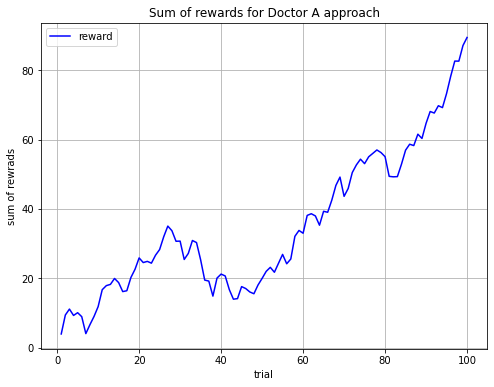

In [19]:
all_rewards_a = doctor_a_approach()

draw_reward_trial_plot(all_rewards_a, "A", 'b')

# Doctor B

In [4]:
def doctor_b_single_action():
    action = random.randint(1, 2) 
    reward = get_reward(action, STUDENT_ID)
    return reward

In [5]:
def doctor_b_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(100):
        reward = doctor_b_single_action()
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

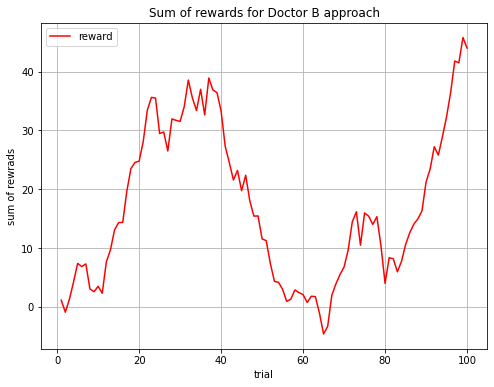

In [22]:
all_rewards_b = doctor_b_approach()

draw_reward_trial_plot(all_rewards_b, "B", 'r')

# Doctor C

In [6]:
def doctor_c_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(10):
        reward = get_reward(1, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    for i in range(10):
        reward = get_reward(2, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    best_action = 1 if all_rewards[9] > (all_rewards[19] - all_rewards[9]) else 2

    for i in range(8):
        for j in range(7):
            reward = get_reward(best_action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
        for j in range(3):
            action = random.randint(1, 2)
            reward = get_reward(action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
    
    return all_rewards

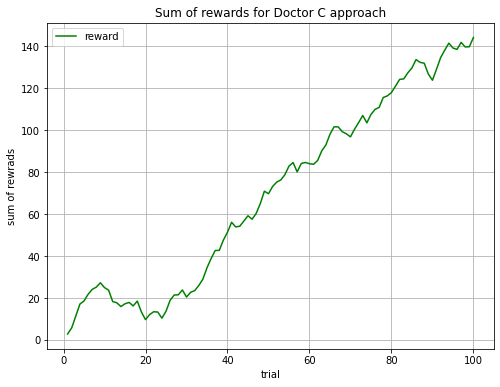

In [24]:
all_rewards_c = doctor_c_approach()

draw_reward_trial_plot(all_rewards_c, "C", 'g')

## Doctor A, B, C

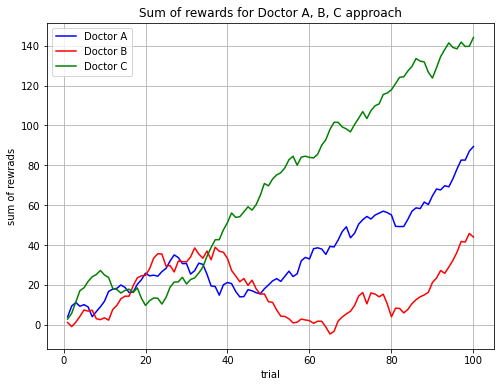

In [31]:
draw_reward_trial_plot_together([all_rewards_a, all_rewards_b, all_rewards_c], ["b", "r", "g"])

# Question 3

In [9]:
def draw_confidence_interval(all_rewards, doctor_name):
    lower_bound = np.percentile(all_rewards, 2.5)
    upper_bound  = np.percentile(all_rewards, 97.5)
    print('Lower bound:',lower_bound)
    print('Upper bound: ',upper_bound)

    all_rewards = np.array(all_rewards)

    plt.figure(figsize=(8,6))
    plt.hist(all_rewards[all_rewards<lower_bound], color='r', label="Outside the confidence interval")
    plt.hist(all_rewards[(all_rewards>=lower_bound)&(all_rewards<=upper_bound)], color='g', label="Inside the confidence interval")
    plt.hist(all_rewards[all_rewards>upper_bound], color='r')
    plt.title("95% confidence interval on the rewards of doctor " + doctor_name +" approach")
    plt.xlabel("reward")
    plt.ylabel("frequency")
    plt.legend()
    plt.grid()
    plt.show()

In [10]:
def repeat_run_of_Q2(number_of_runs):
    for i in range(number_of_runs):
        print("###################################### Run number {} ###########################################".format(i+1))
    
        all_rewards_a = doctor_a_approach()
        draw_reward_trial_plot(all_rewards_a, "A", 'b')
        draw_confidence_interval(all_rewards_a, "A")

        print("======================================================================")

        all_rewards_b = doctor_b_approach()
        draw_reward_trial_plot(all_rewards_b, "B", 'r')
        draw_confidence_interval(all_rewards_b, "B")

        print("======================================================================")

        all_rewards_c = doctor_c_approach()
        draw_reward_trial_plot(all_rewards_c, "C", 'g')
        draw_confidence_interval(all_rewards_c, "C")

        print("======================================================================")

        draw_reward_trial_plot_together([all_rewards_a, all_rewards_b, all_rewards_c], ["b", "r", "g"])   

## Run 5 times

###################################### Run number 1 ###########################################


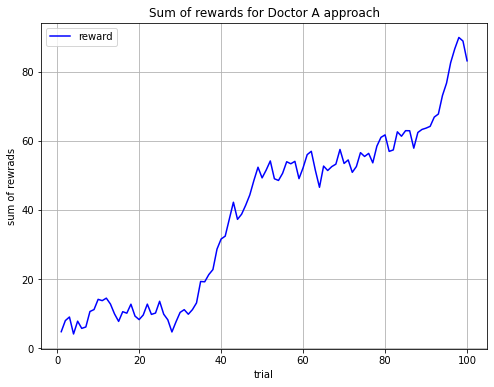

Lower bound: 5.224535966088991
Upper bound:  84.92092675789833


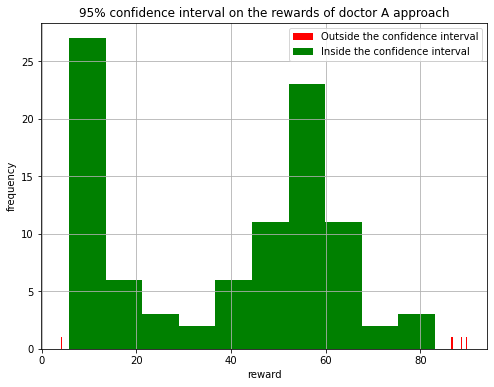

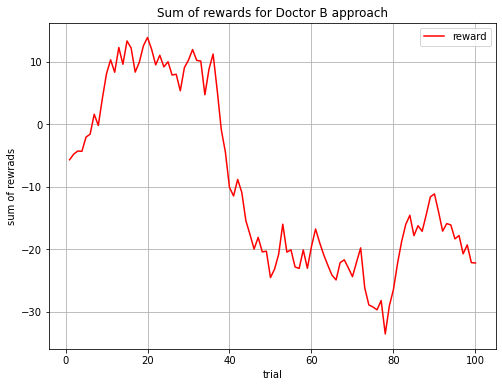

Lower bound: -29.188213559041497
Upper bound:  12.454773179338611


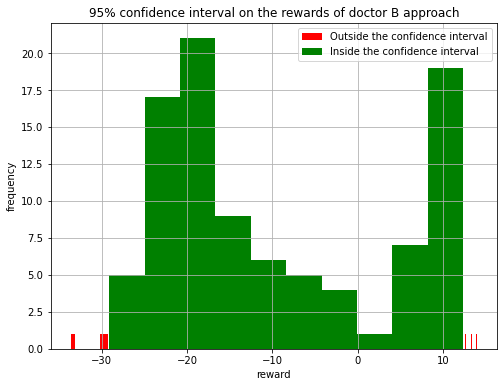

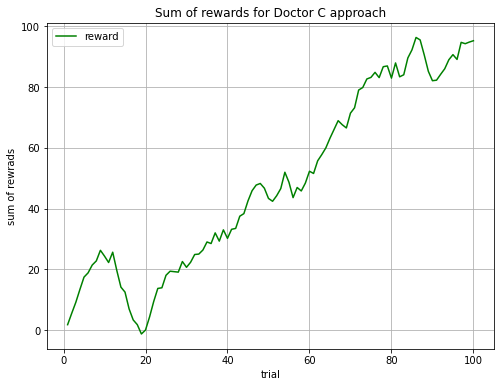

Lower bound: 1.855277529954893
Upper bound:  95.00612220512443


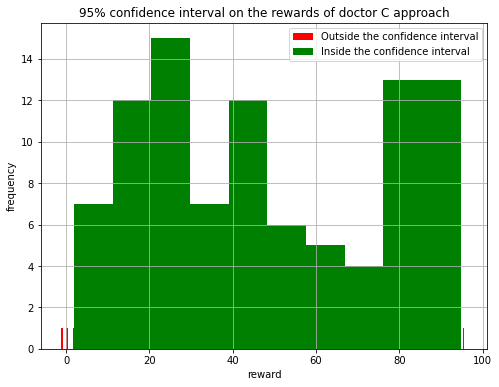

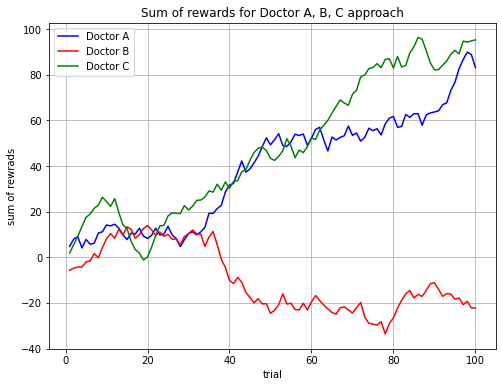

###################################### Run number 2 ###########################################


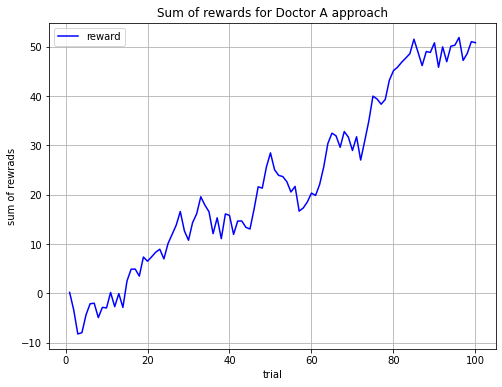

Lower bound: -4.650561612760059
Upper bound:  50.9426299106852


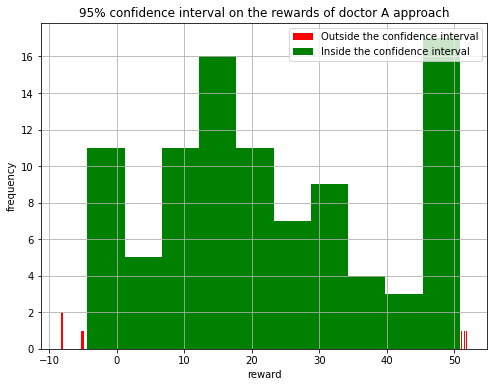

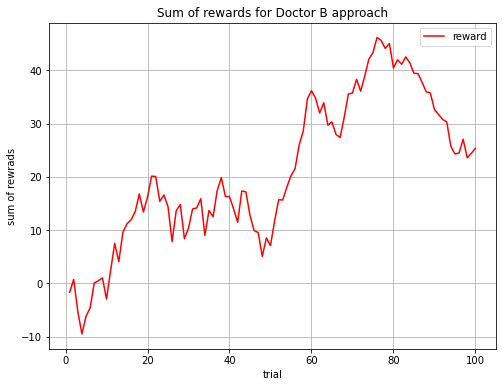

Lower bound: -4.96154106987936
Upper bound:  44.5715483546469


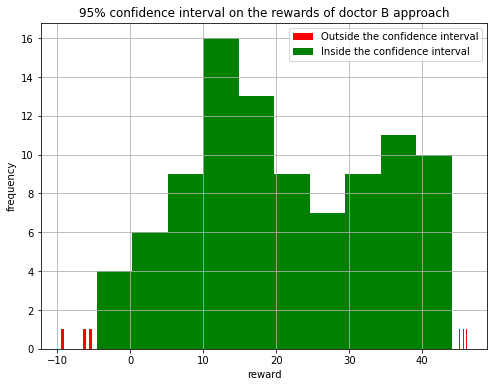

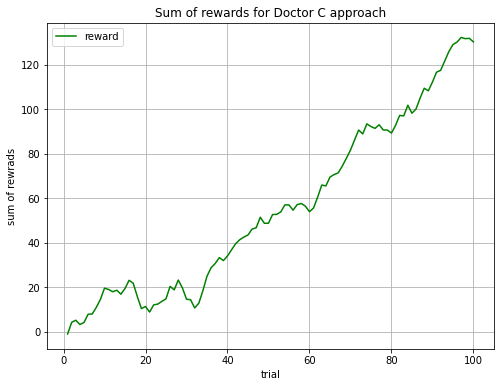

Lower bound: 4.196188613005859
Upper bound:  130.98973621412125


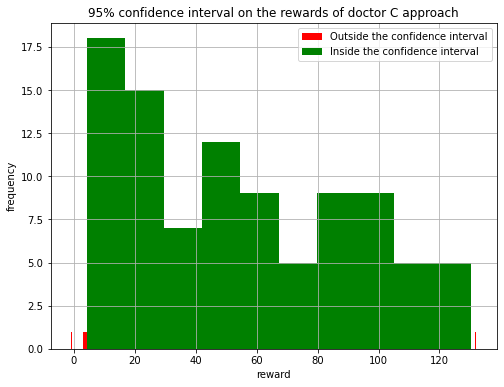

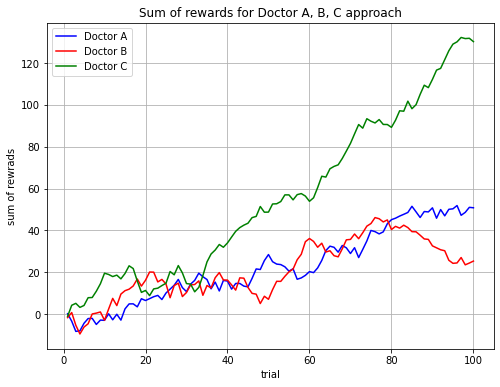

###################################### Run number 3 ###########################################


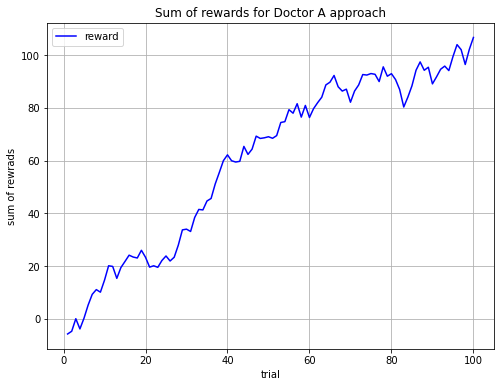

Lower bound: -1.9823196333464108
Upper bound:  102.1496450492446


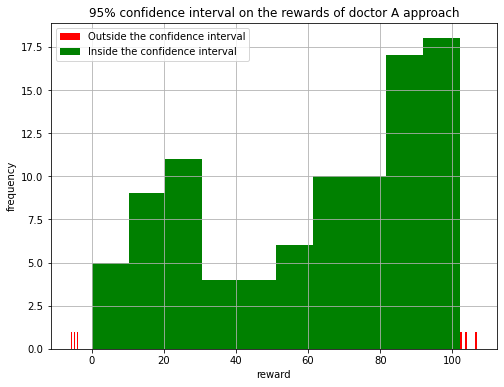

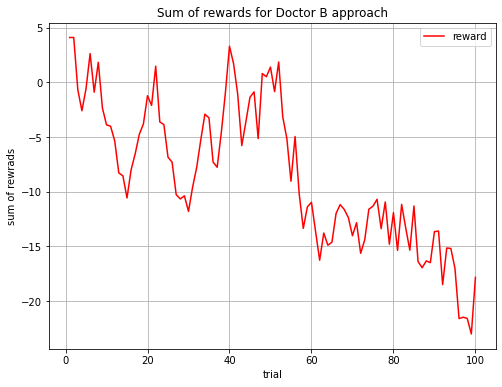

Lower bound: -21.539815448212202
Upper bound:  2.9832644980806484


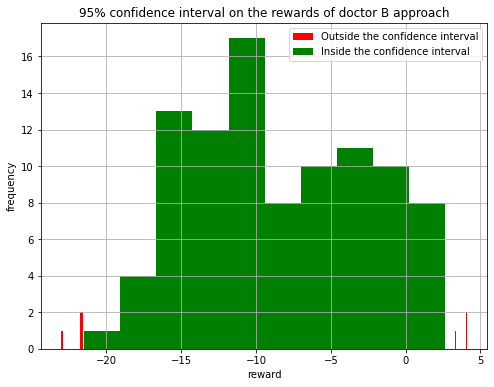

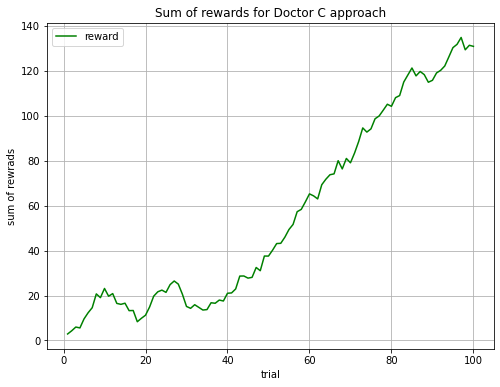

Lower bound: 5.768277818261843
Upper bound:  131.1218237278697


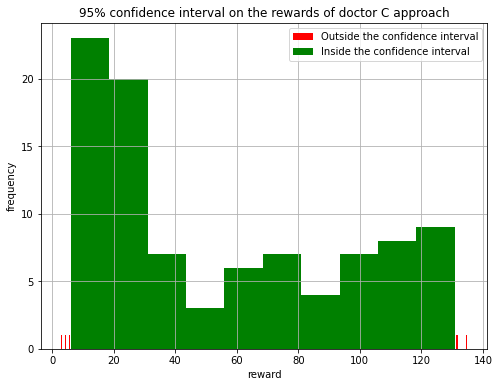

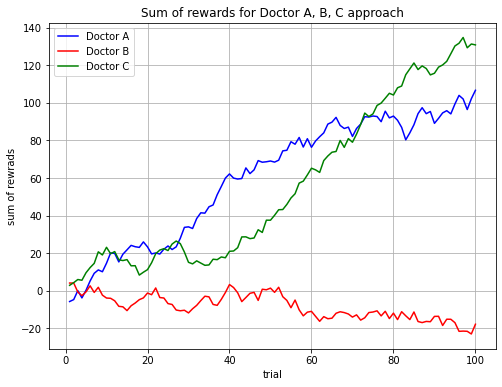

###################################### Run number 4 ###########################################


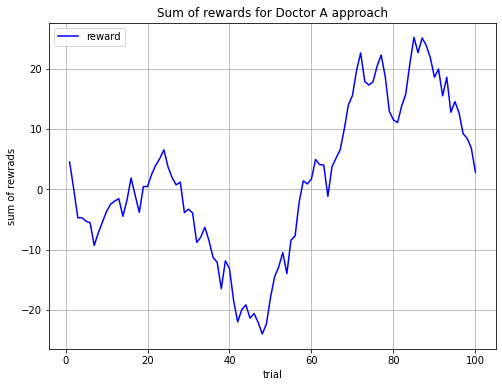

Lower bound: -22.058511706338273
Upper bound:  23.27340934462708


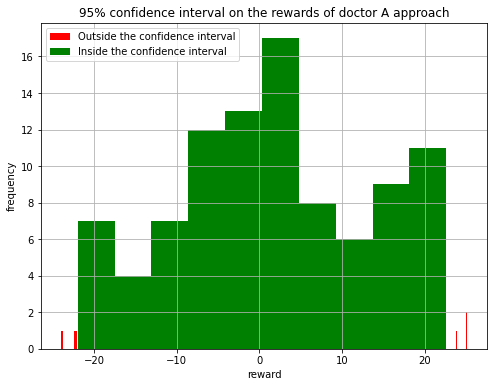

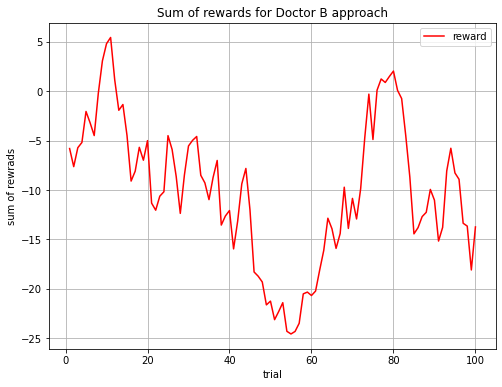

Lower bound: -23.929349569740218
Upper bound:  2.5894816614739162


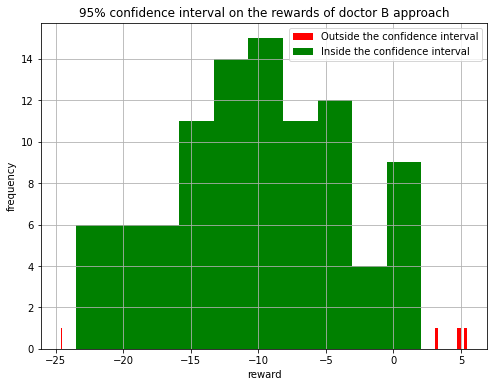

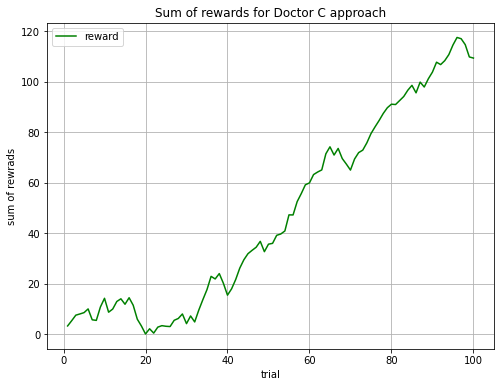

Lower bound: 2.375460891446207
Upper bound:  114.55597006057457


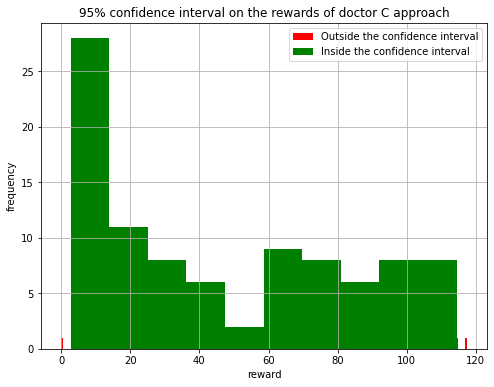

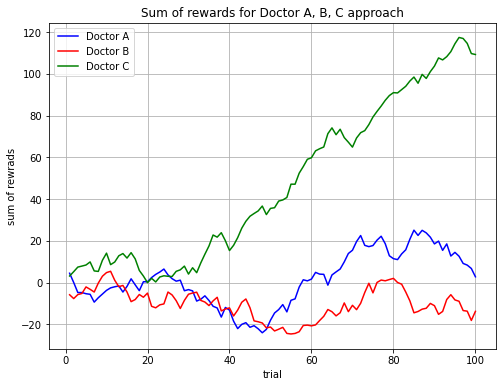

###################################### Run number 5 ###########################################


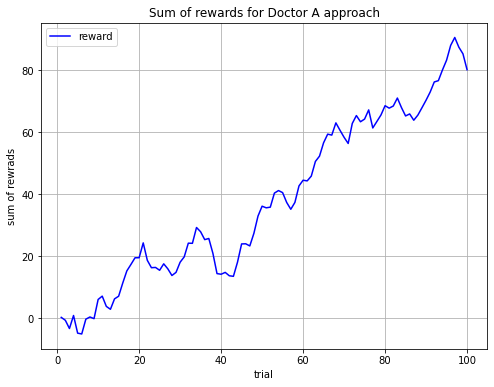

Lower bound: -2.0136072992938083
Upper bound:  86.46368955528717


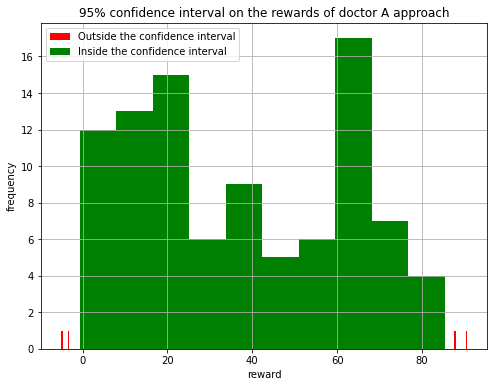

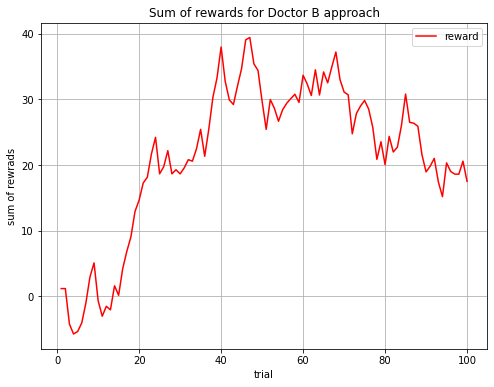

Lower bound: -4.1625168133216475
Upper bound:  37.623787490560744


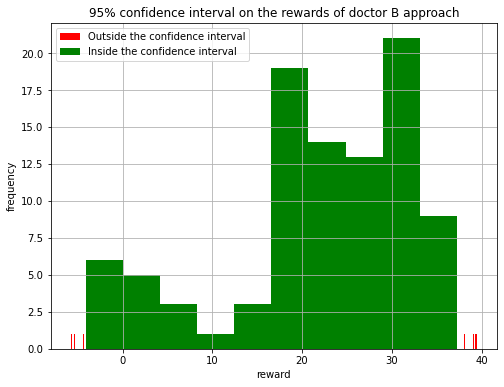

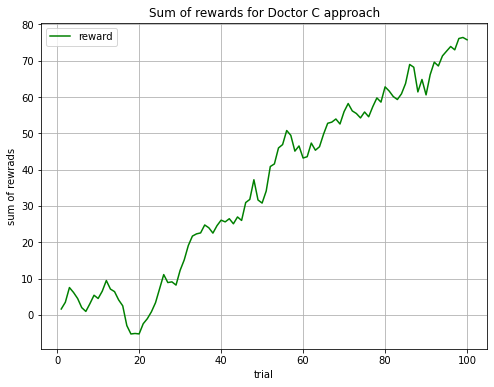

Lower bound: -4.103269789663244
Upper bound:  74.87590846583377


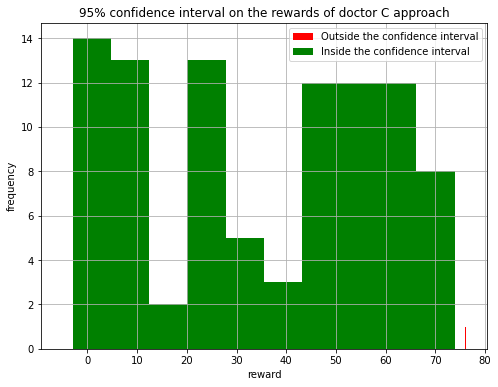

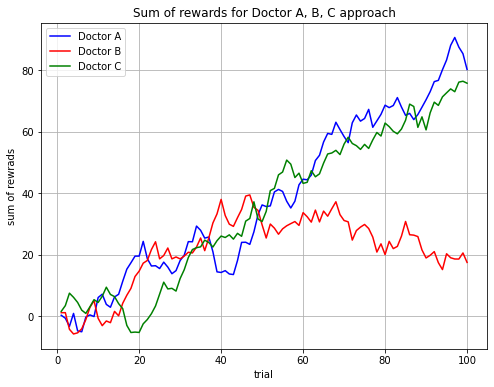

In [11]:
repeat_run_of_Q2(5)

## Run 20 times

###################################### Run number 1 ###########################################


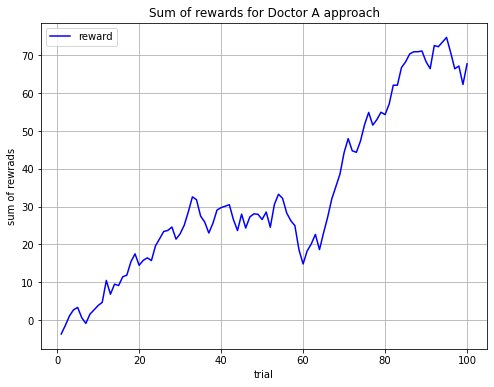

Lower bound: -0.16030239619976117
Upper bound:  72.4382932111568


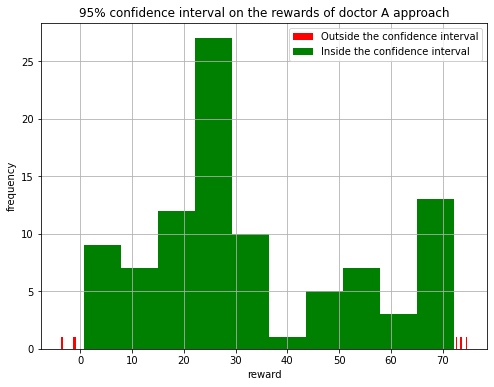

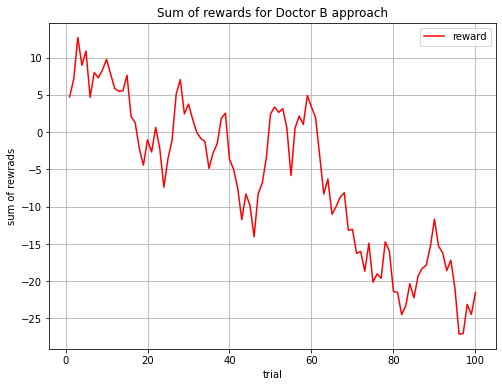

Lower bound: -24.466559145020142
Upper bound:  9.394860279880707


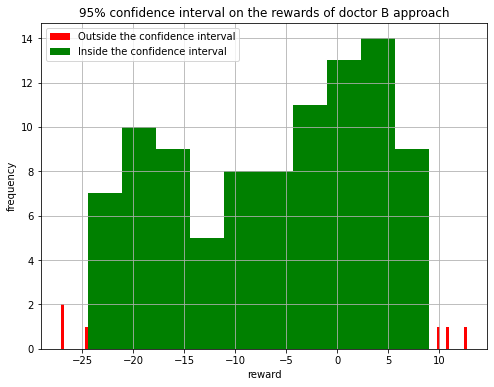

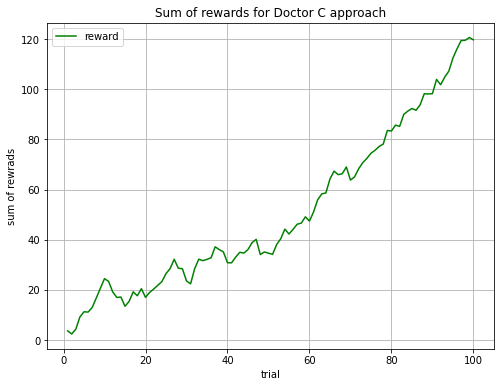

Lower bound: 6.661509243513117
Upper bound:  119.50572191969015


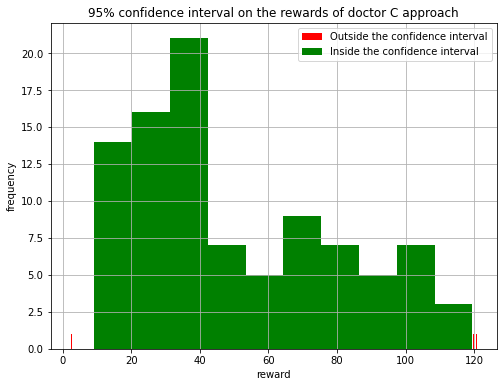

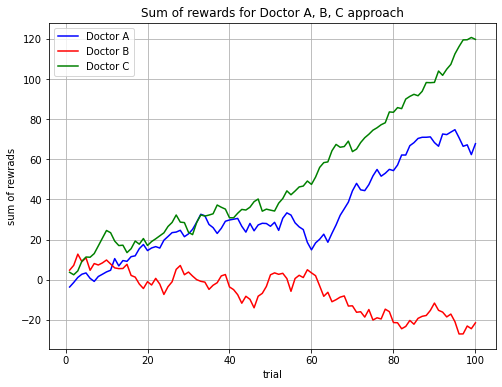

###################################### Run number 2 ###########################################


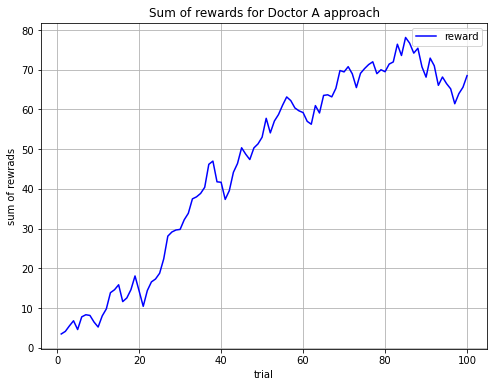

Lower bound: 4.88727492037562
Upper bound:  75.94173598150032


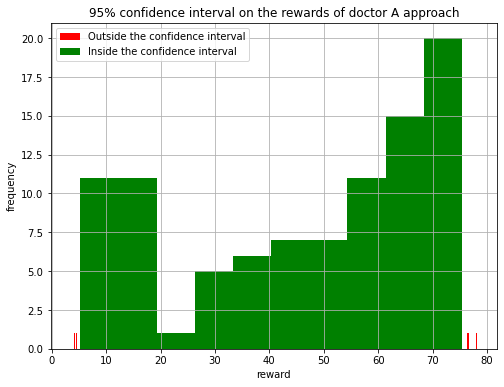

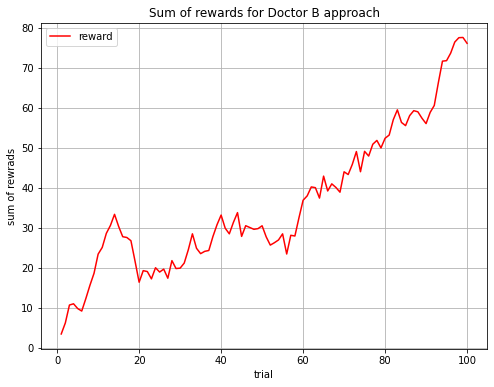

Lower bound: 9.51086205386386
Upper bound:  76.3097022000229


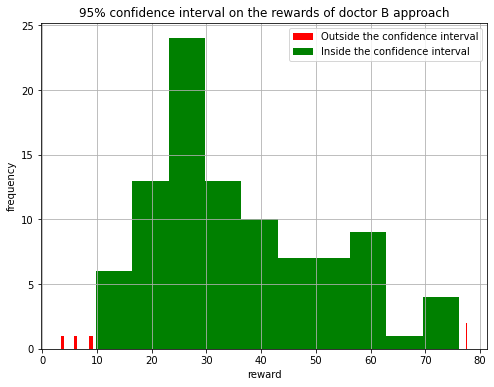

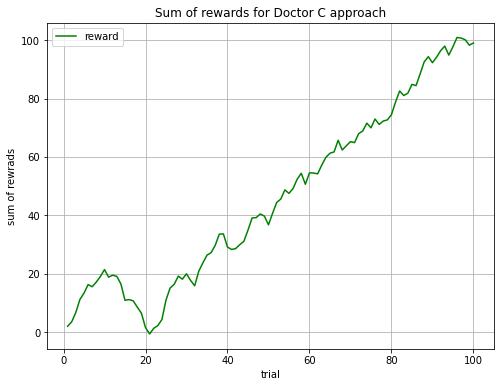

Lower bound: 1.7525962551796637
Upper bound:  99.61874805886805


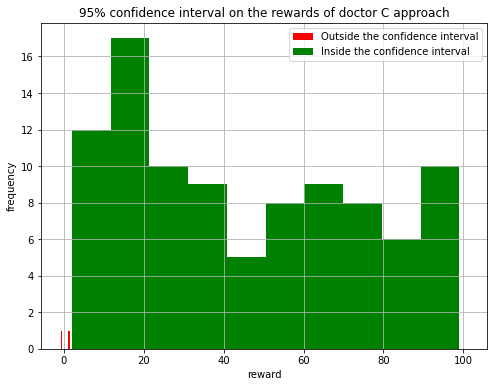

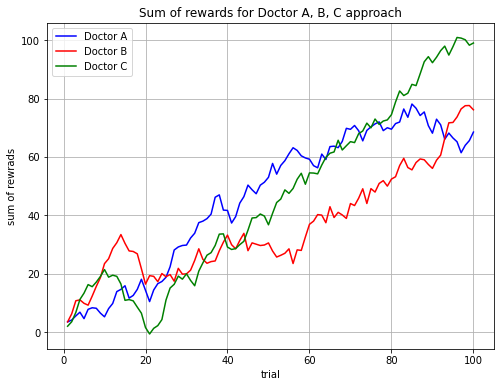

###################################### Run number 3 ###########################################


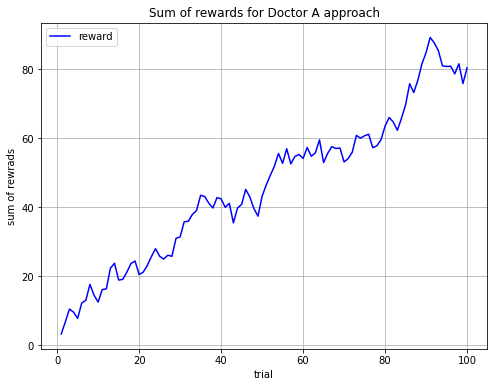

Lower bound: 8.695305242414799
Upper bound:  85.17186745496026


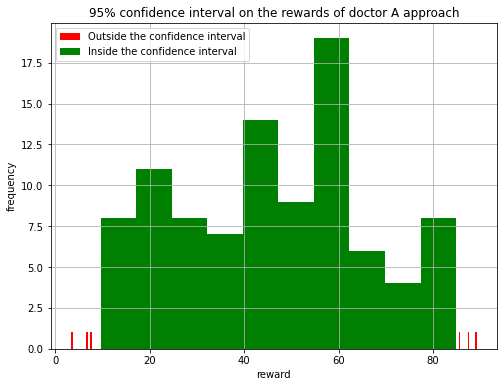

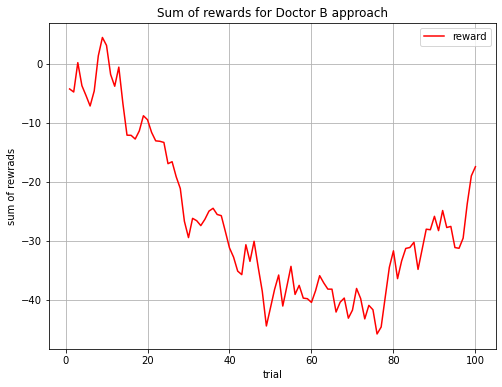

Lower bound: -43.884436106142665
Upper bound:  0.8097708331776713


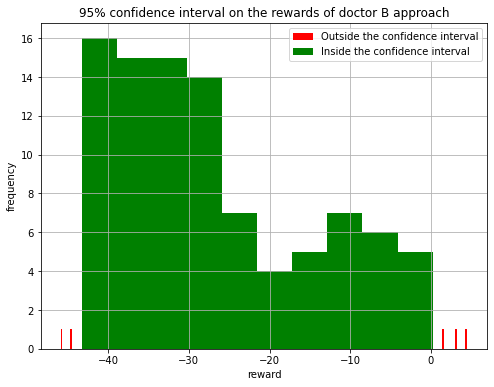

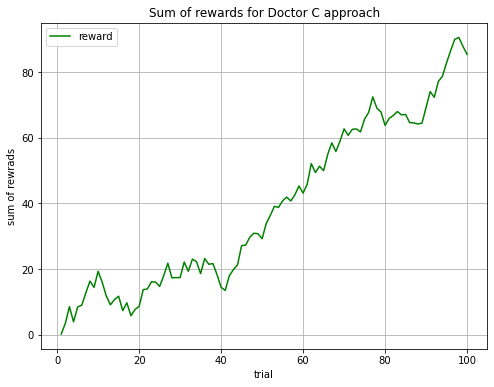

Lower bound: 4.833917444699974
Upper bound:  87.25262066618433


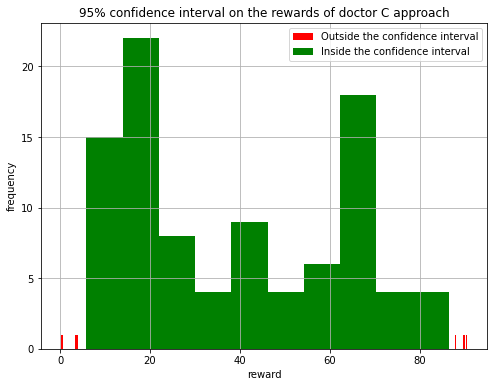

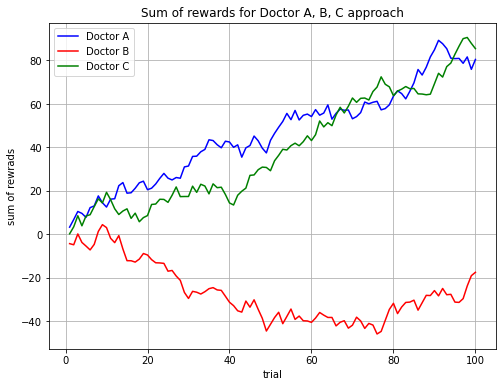

###################################### Run number 4 ###########################################


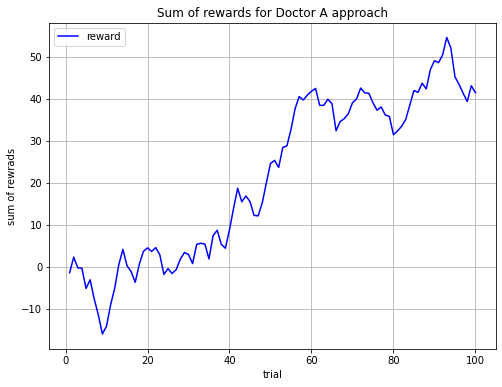

Lower bound: -10.358579064193217
Upper bound:  49.834493869313725


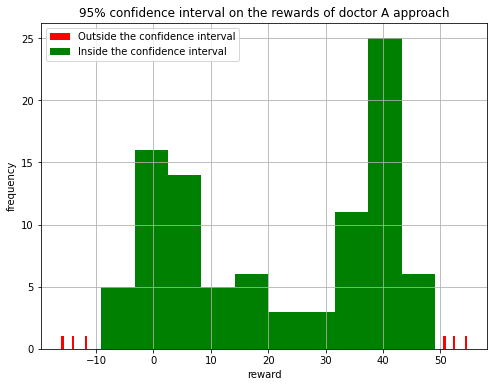

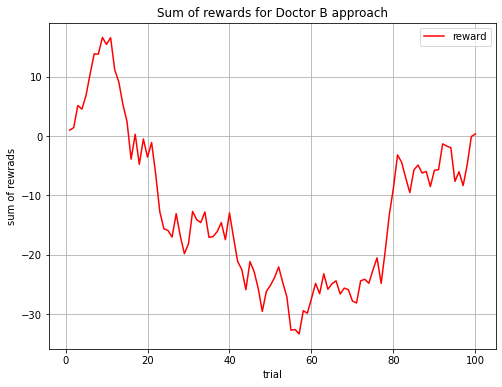

Lower bound: -31.24869206245516
Upper bound:  14.674507015007256


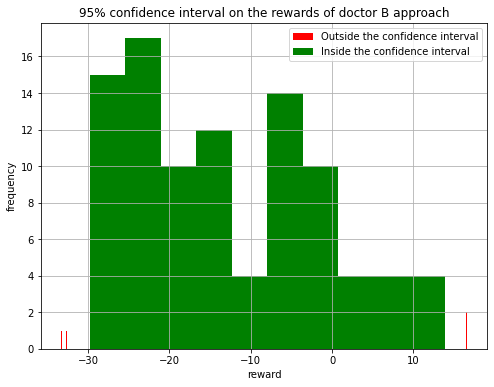

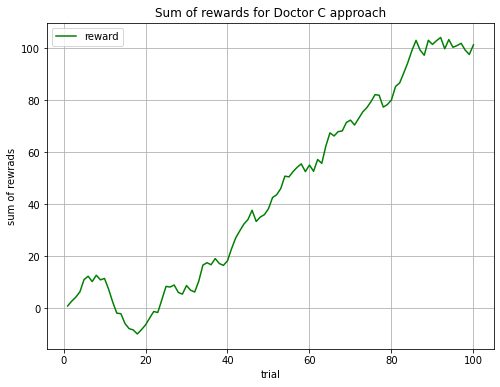

Lower bound: -8.156621041642387
Upper bound:  103.10714122450322


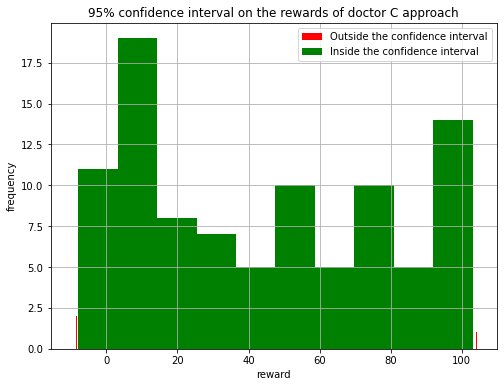

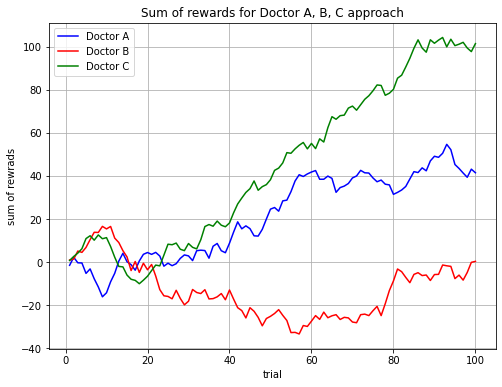

###################################### Run number 5 ###########################################


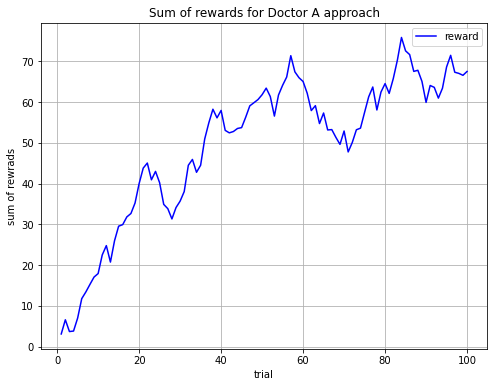

Lower bound: 5.136987718216939
Upper bound:  71.54598869913845


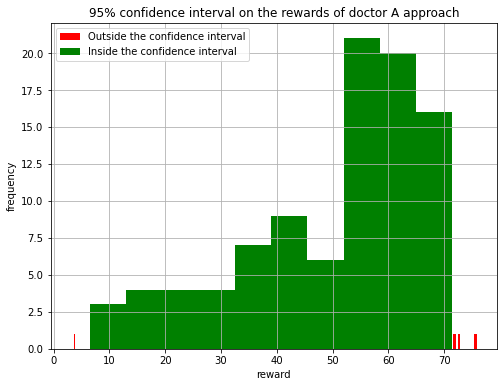

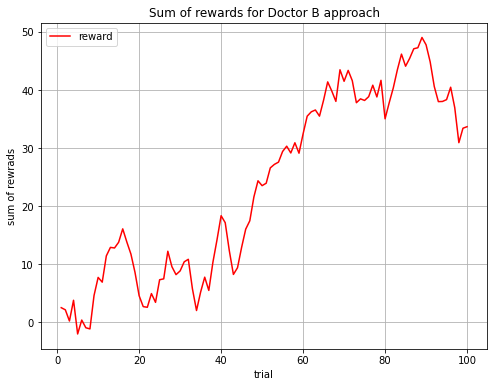

Lower bound: -0.37294833629493096
Upper bound:  47.196507963500906


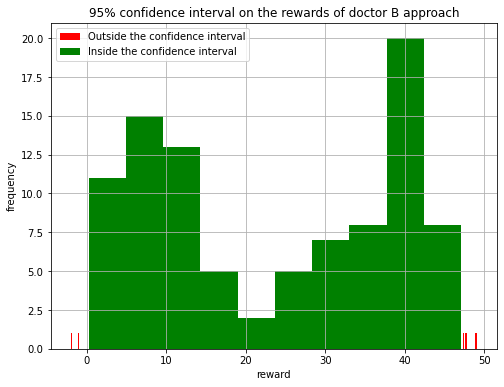

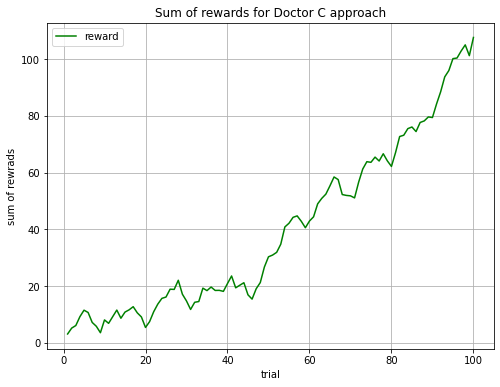

Lower bound: 5.298212037009475
Upper bound:  102.02101263507367


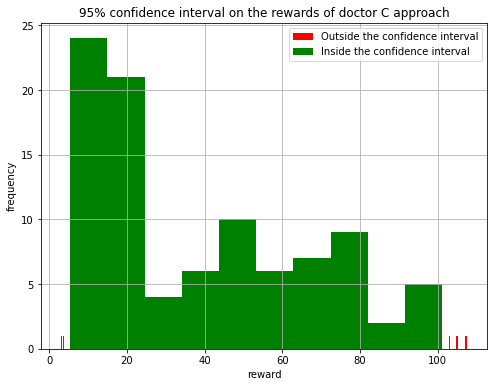

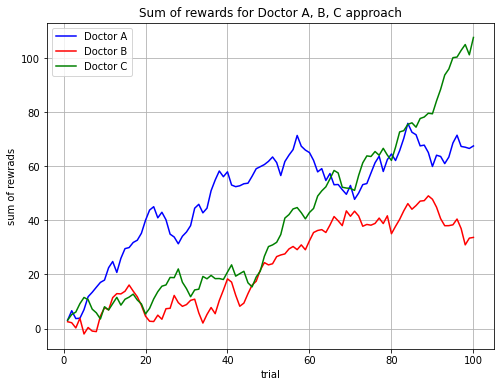

###################################### Run number 6 ###########################################


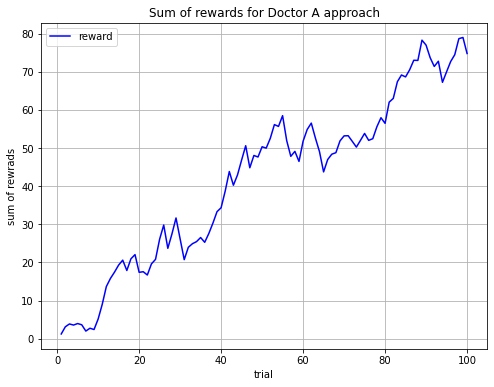

Lower bound: 2.561594065300325
Upper bound:  77.67296077445725


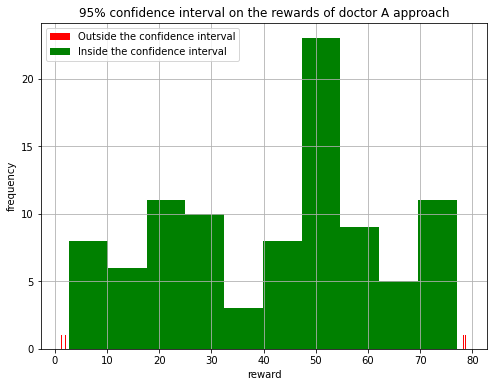

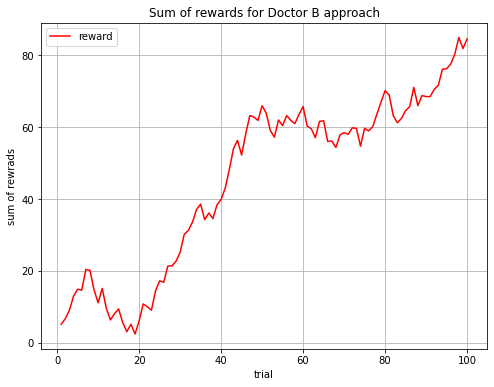

Lower bound: 5.154789072306268
Upper bound:  81.1098918893964


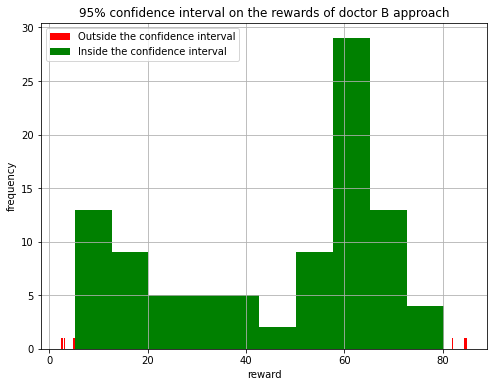

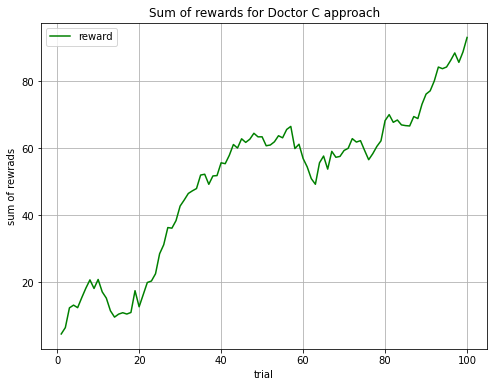

Lower bound: 10.007871327820611
Upper bound:  87.4604969434495


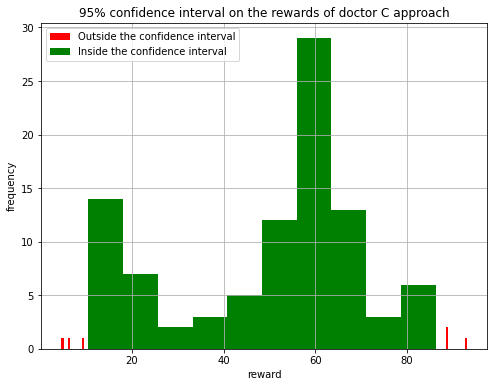

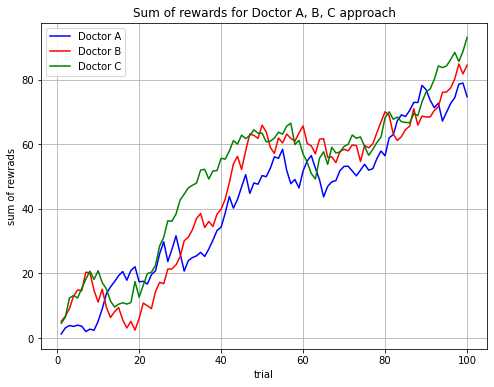

###################################### Run number 7 ###########################################


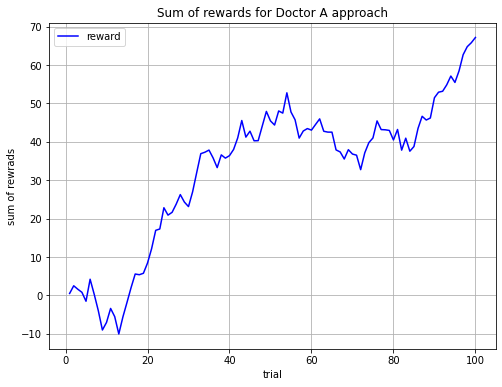

Lower bound: -6.3796012572454766
Upper bound:  63.80304233608114


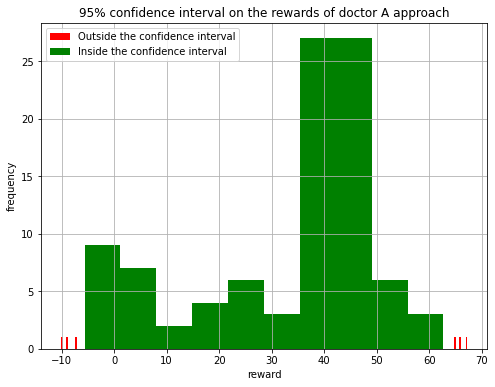

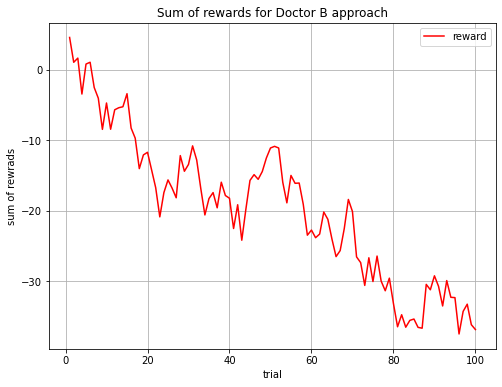

Lower bound: -36.58596528936157
Upper bound:  1.0263476330259675


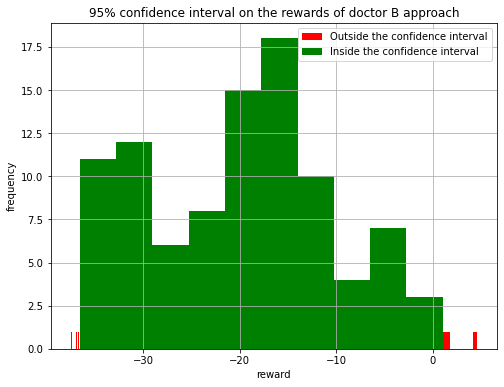

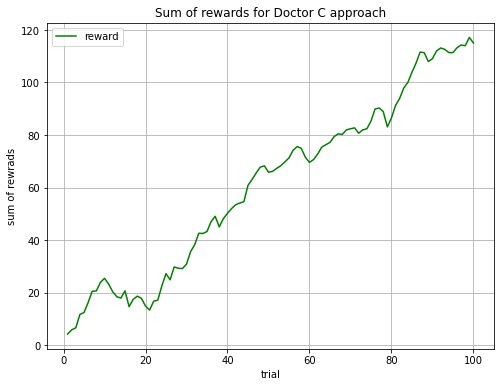

Lower bound: 9.018007122053394
Upper bound:  114.1409400804622


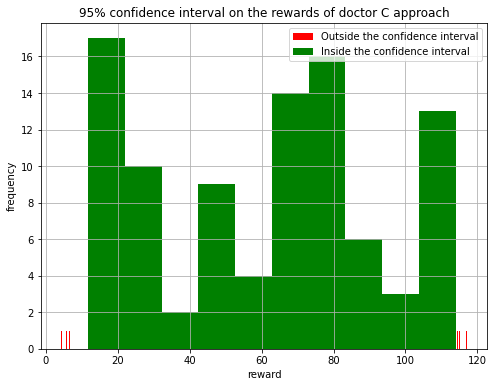

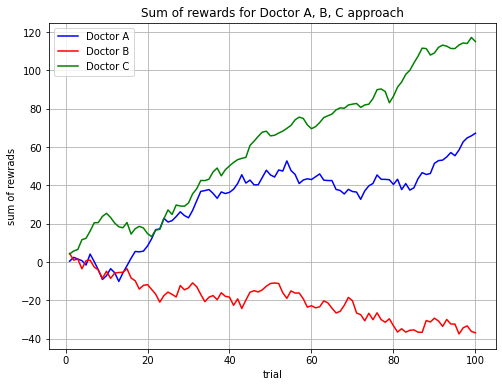

###################################### Run number 8 ###########################################


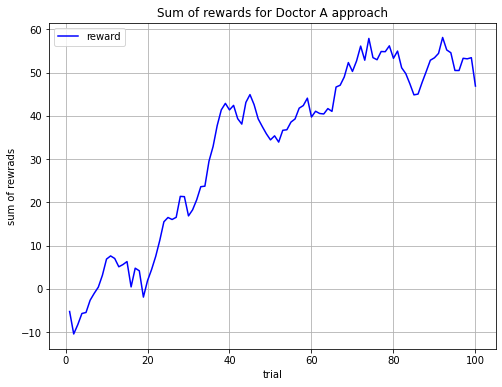

Lower bound: -5.605306706004588
Upper bound:  56.189989644139054


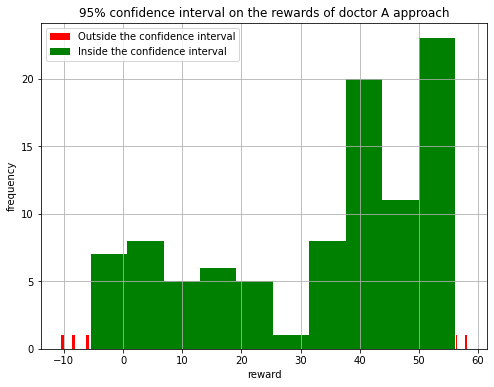

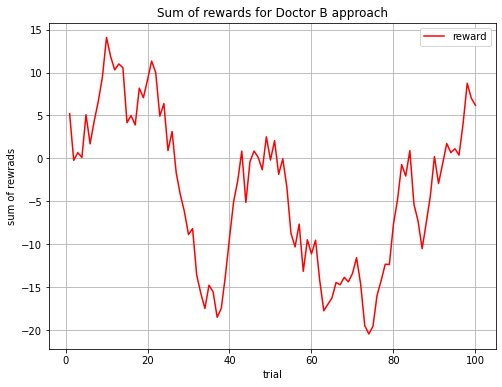

Lower bound: -19.014838783231564
Upper bound:  11.174723972018715


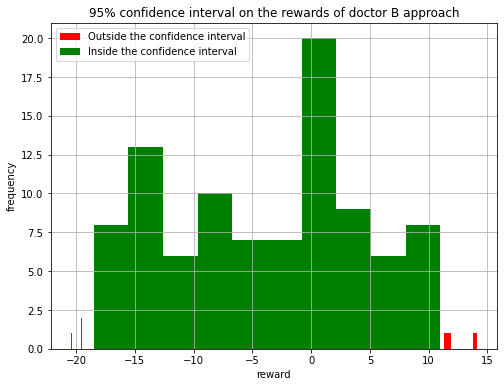

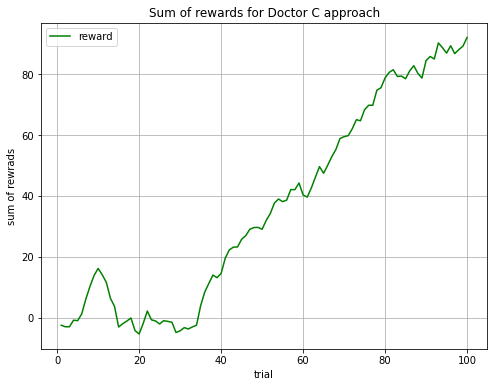

Lower bound: -4.287878661428439
Upper bound:  89.27524183940506


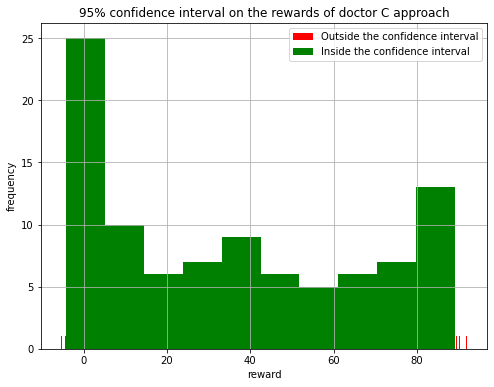

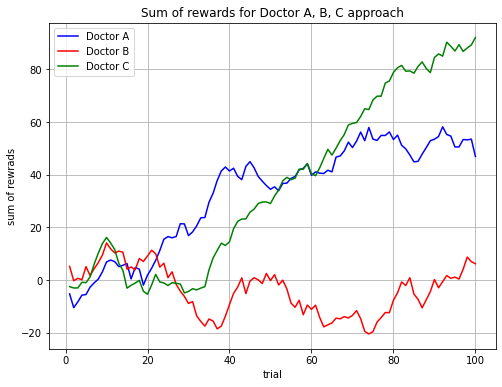

###################################### Run number 9 ###########################################


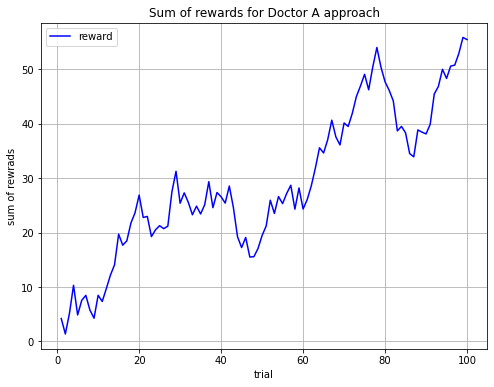

Lower bound: 4.558800422163645
Upper bound:  53.47066755465496


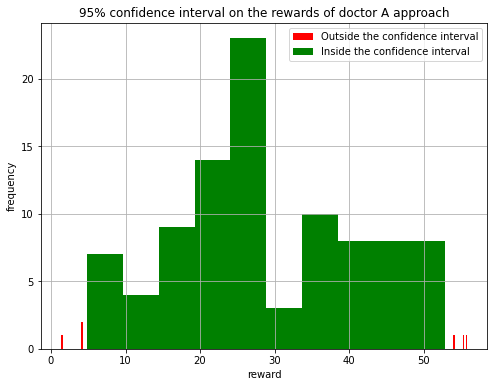

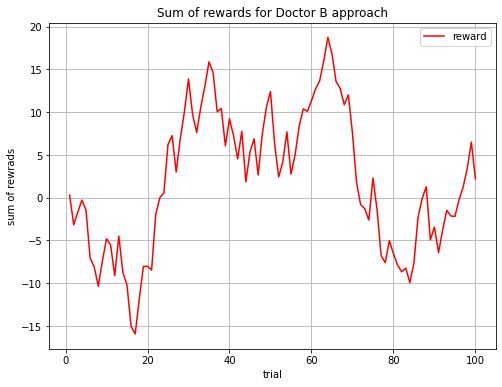

Lower bound: -11.13634385548719
Upper bound:  15.949411892688198


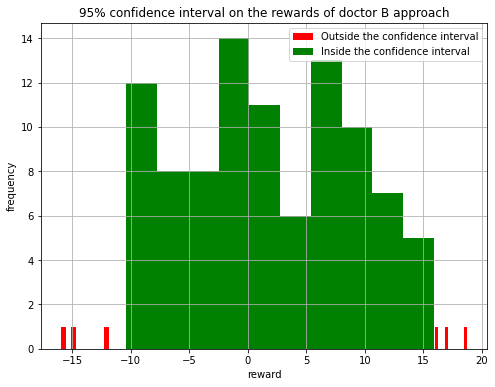

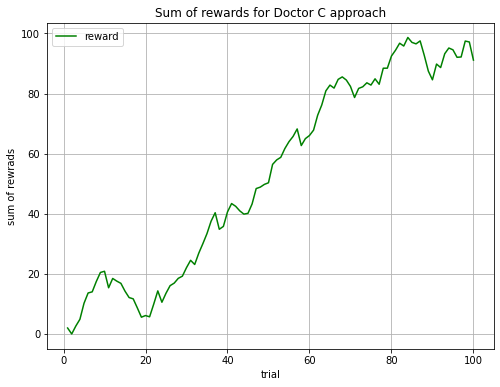

Lower bound: 3.568951511528115
Upper bound:  97.3336361841166


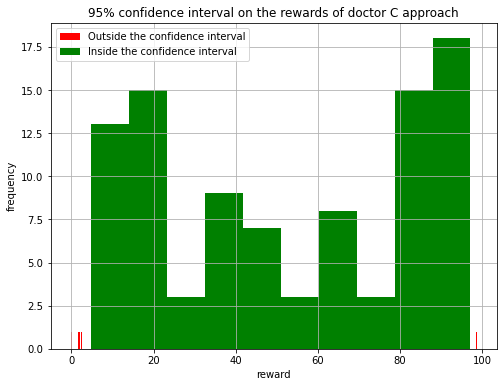

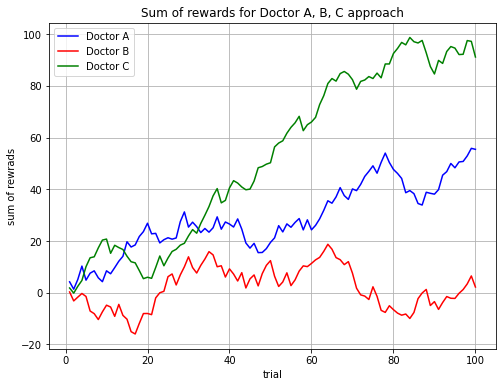

###################################### Run number 10 ###########################################


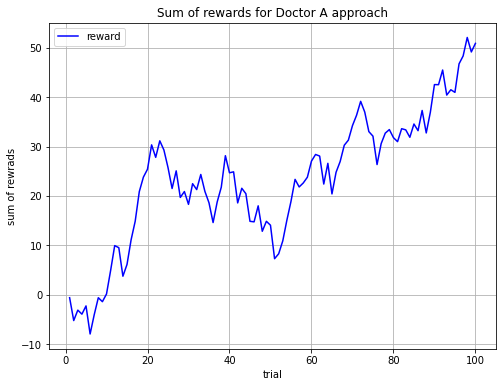

Lower bound: -4.003133983267002
Upper bound:  48.76772635888113


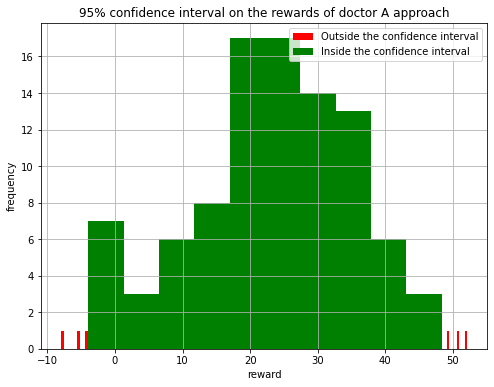

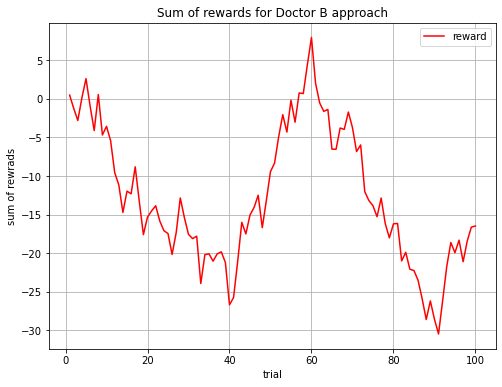

Lower bound: -27.689358833586066
Upper bound:  2.3437357654333155


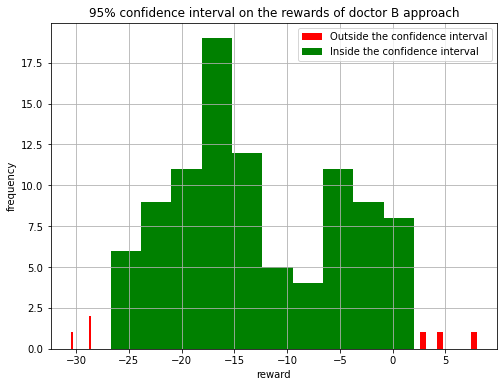

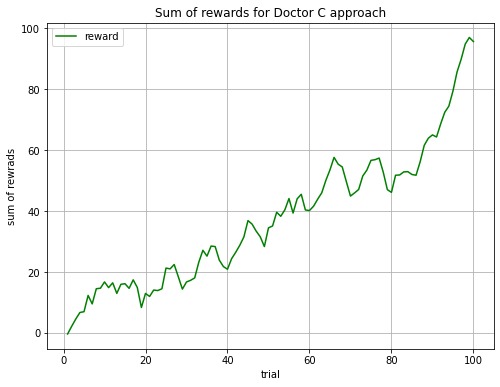

Lower bound: 5.571537310842133
Upper bound:  92.47112205410934


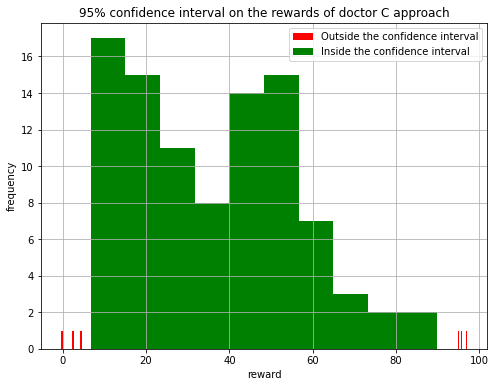

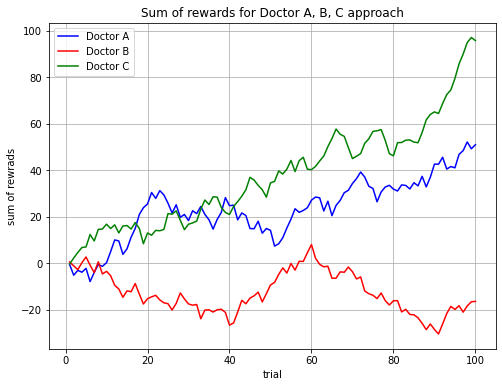

###################################### Run number 11 ###########################################


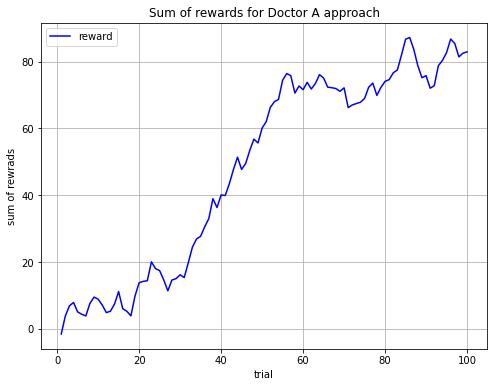

Lower bound: 3.901825509023019
Upper bound:  86.10119205991168


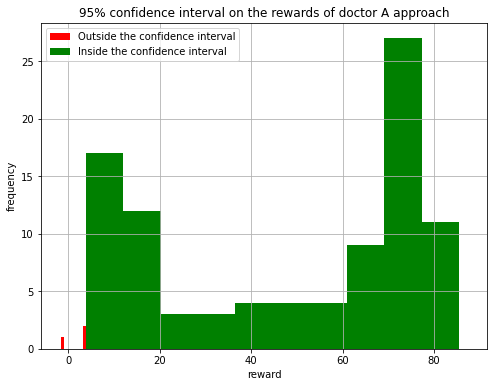

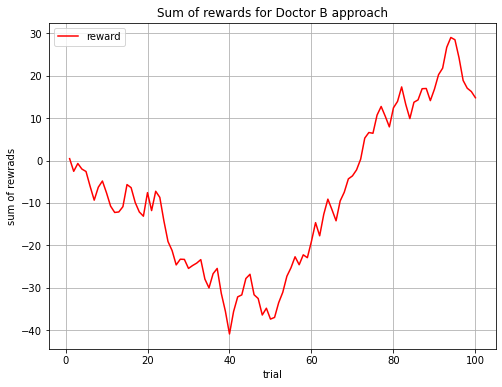

Lower bound: -36.71331055776292
Upper bound:  25.500466682335812


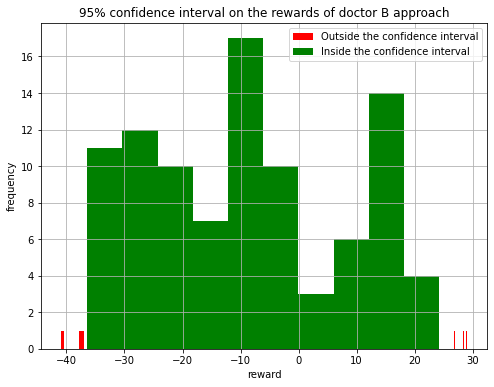

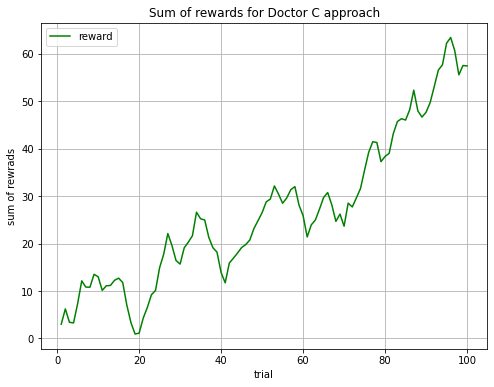

Lower bound: 3.1312698874852347
Upper bound:  59.20303483764423


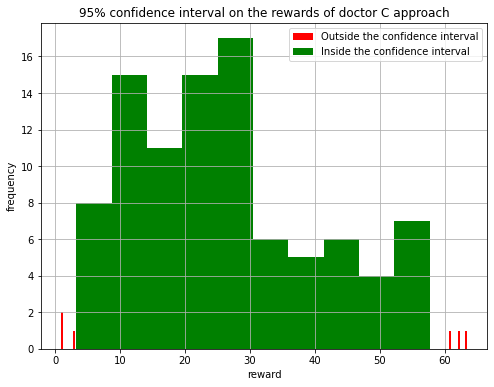

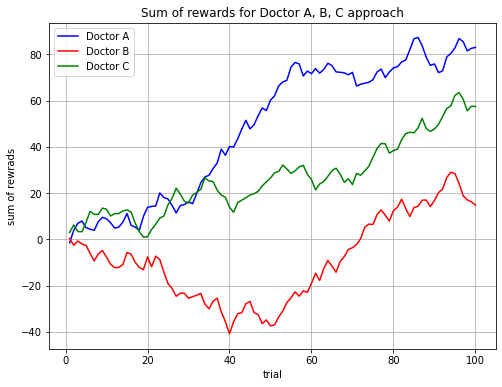

###################################### Run number 12 ###########################################


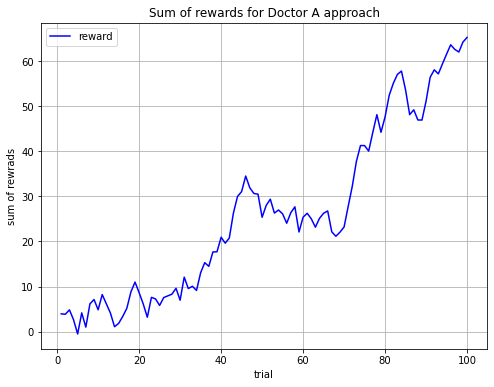

Lower bound: 1.4403035544352476
Upper bound:  63.13634661230339


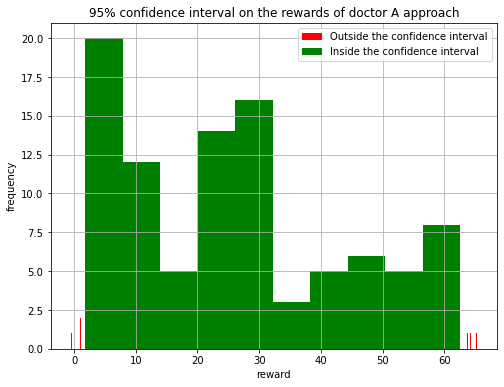

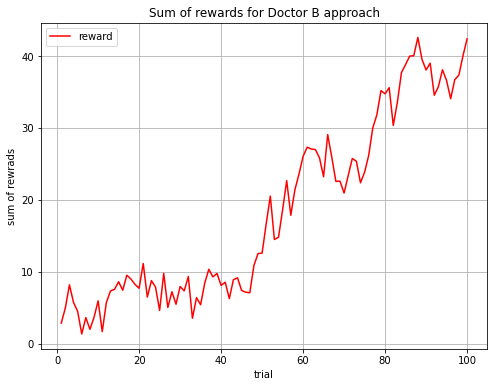

Lower bound: 2.426386693080305
Upper bound:  40.020675059053374


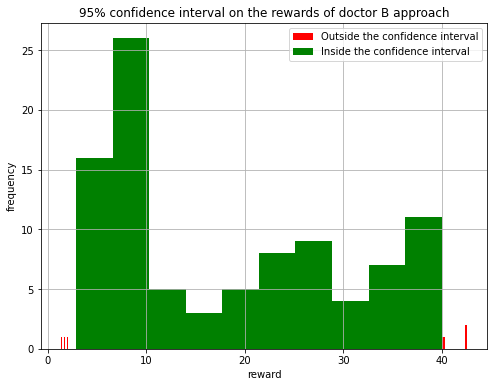

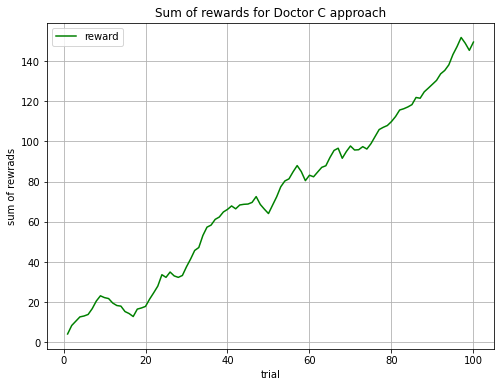

Lower bound: 11.53809445736068
Upper bound:  148.08144854930342


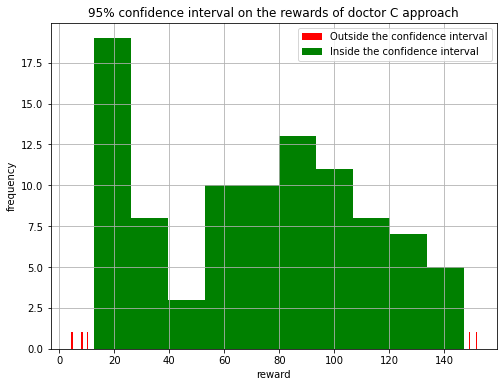

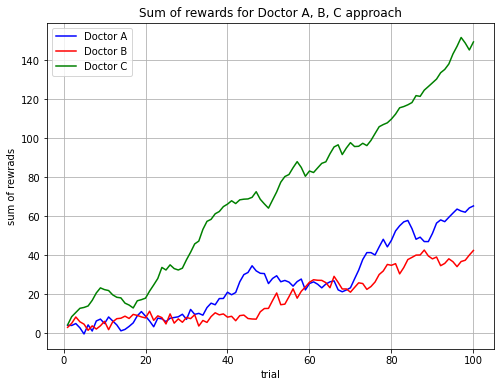

###################################### Run number 13 ###########################################


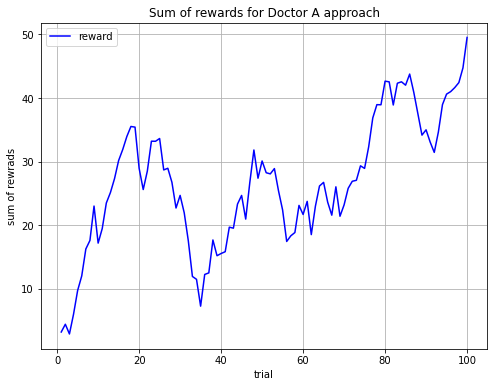

Lower bound: 5.157033738375395
Upper bound:  43.2297097392112


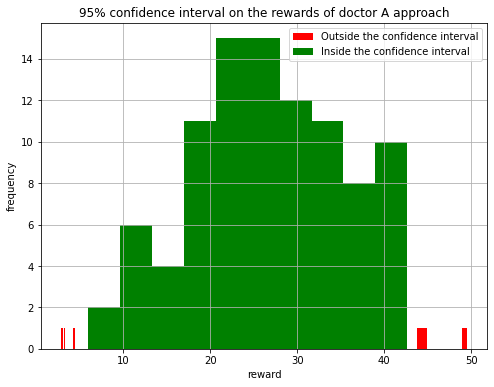

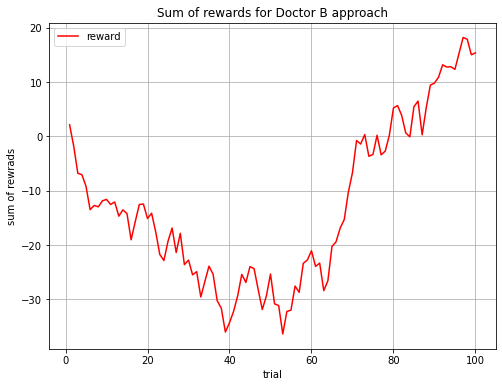

Lower bound: -33.31984360935833
Upper bound:  15.34176964090331


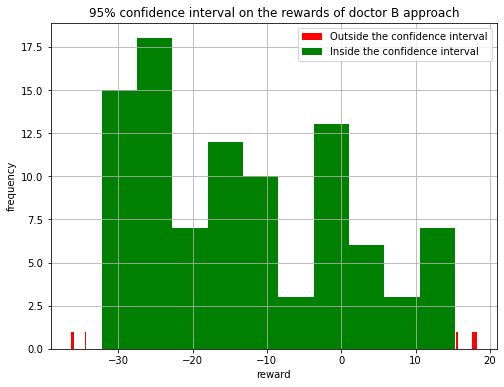

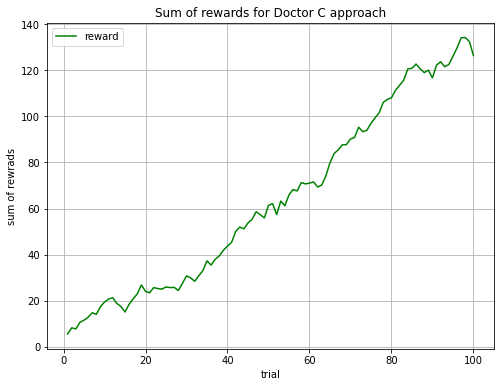

Lower bound: 9.350998329597493
Upper bound:  131.18043789040684


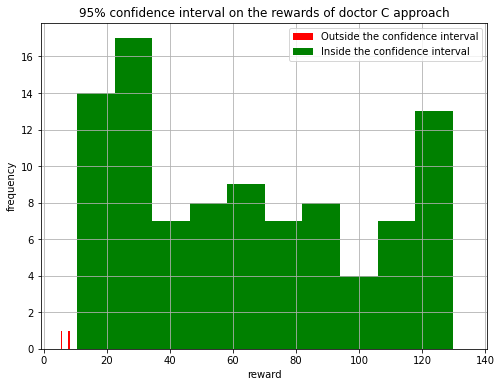

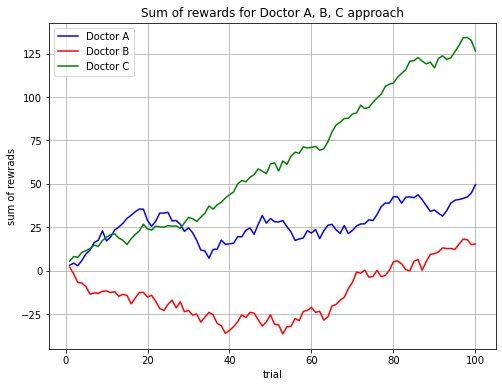

###################################### Run number 14 ###########################################


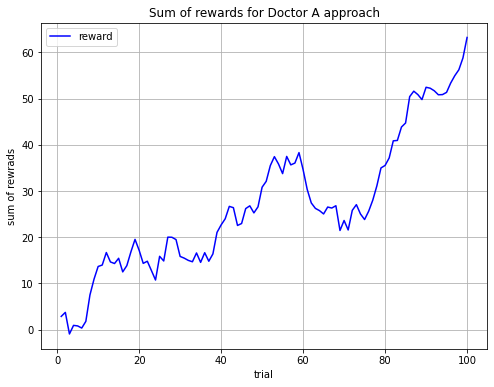

Lower bound: 0.855926066989163
Upper bound:  55.63276449215558


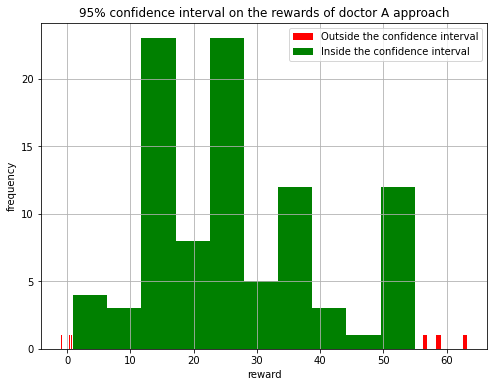

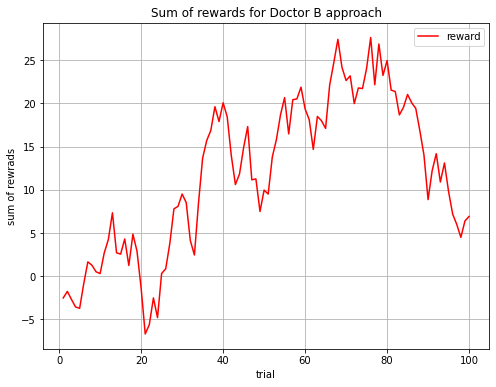

Lower bound: -4.273596496967752
Upper bound:  25.96187174916011


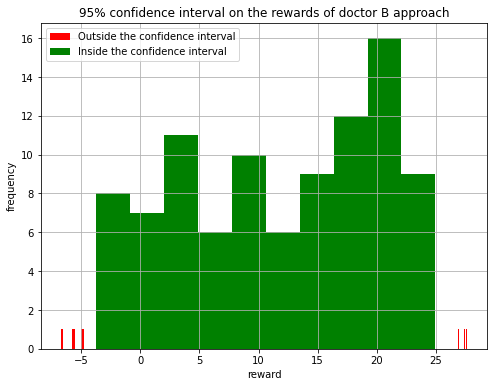

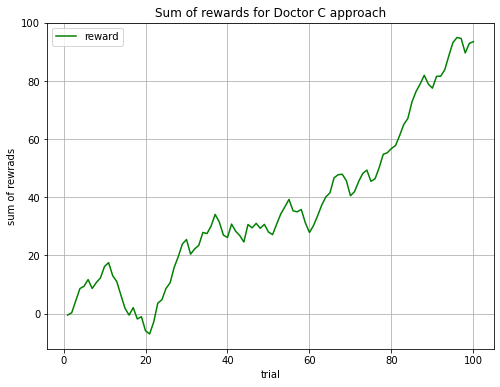

Lower bound: -2.4221447582521947
Upper bound:  93.41885867616504


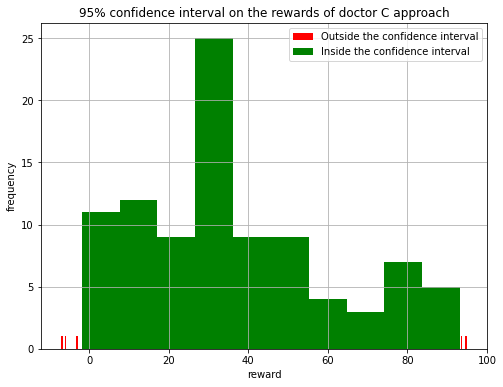

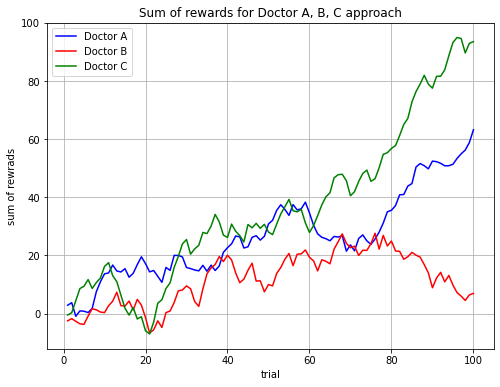

###################################### Run number 15 ###########################################


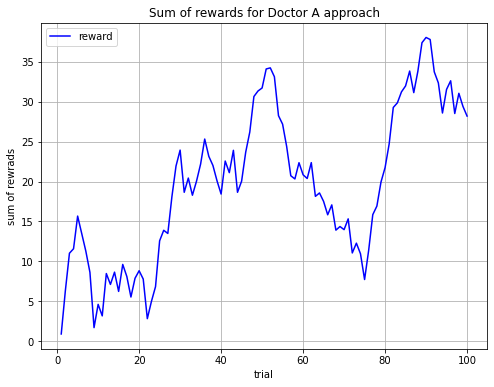

Lower bound: 2.9794445434652355
Upper bound:  35.904567000555595


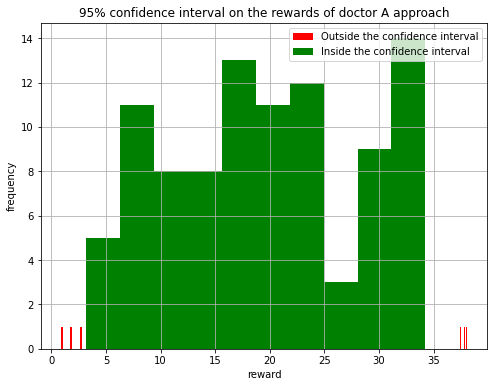

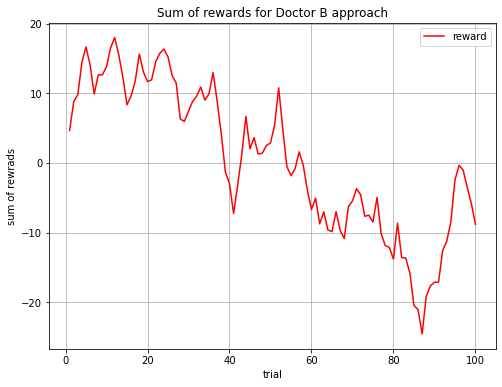

Lower bound: -19.85086876370328
Upper bound:  16.460020543199015


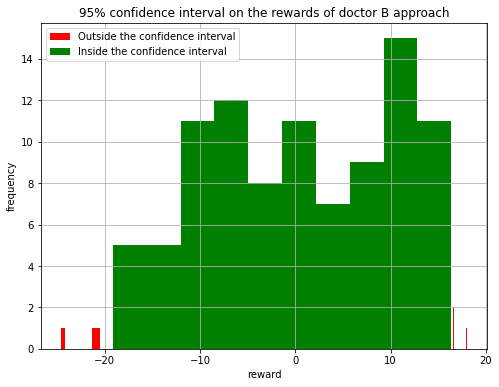

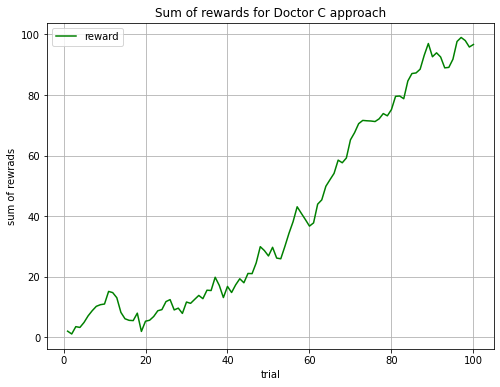

Lower bound: 2.6641142048112867
Upper bound:  97.32083513997446


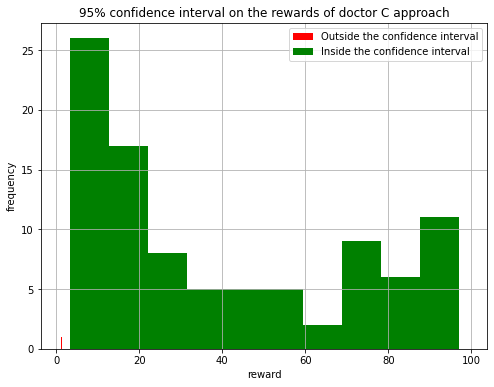

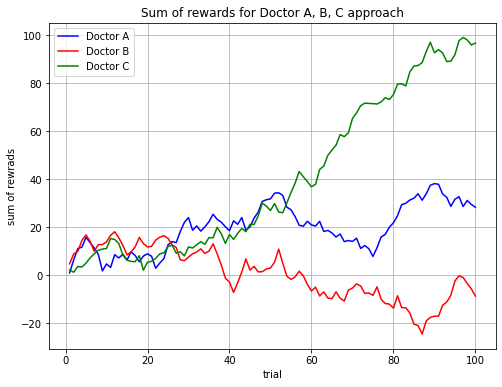

###################################### Run number 16 ###########################################


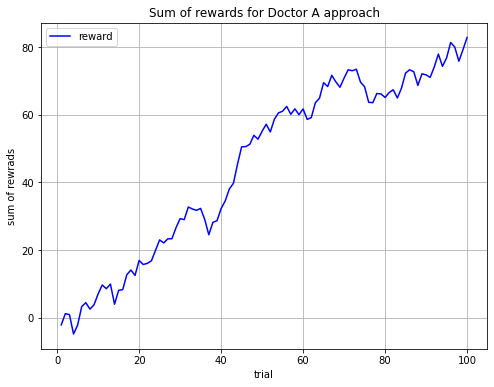

Lower bound: -0.6606395421729476
Upper bound:  79.6488049665584


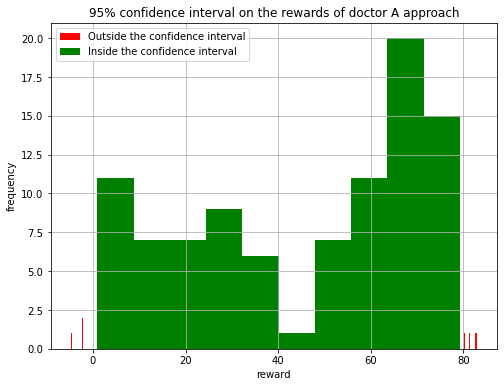

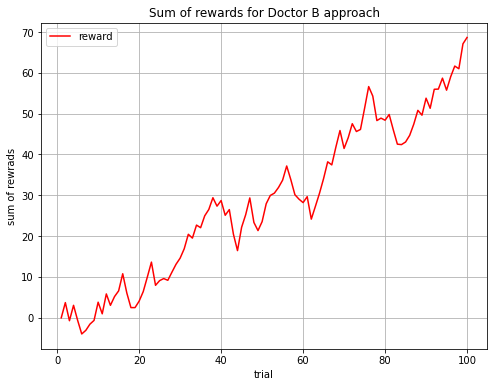

Lower bound: -1.181602617838175
Upper bound:  61.351954198050166


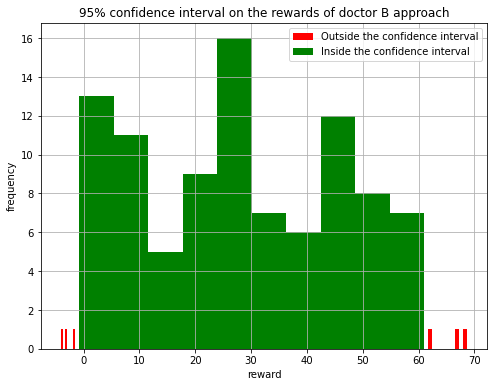

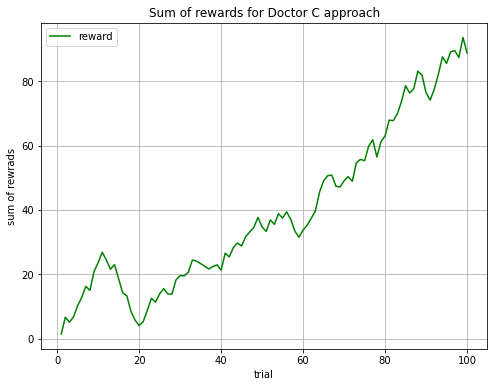

Lower bound: 5.181401198962812
Upper bound:  88.99385300110121


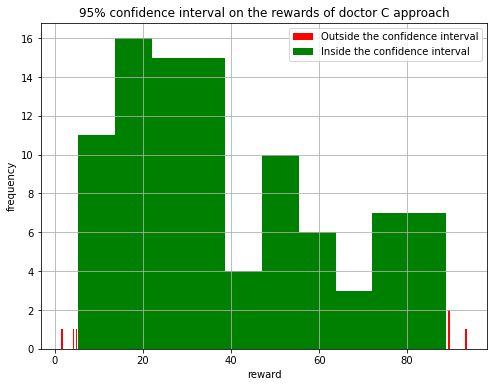

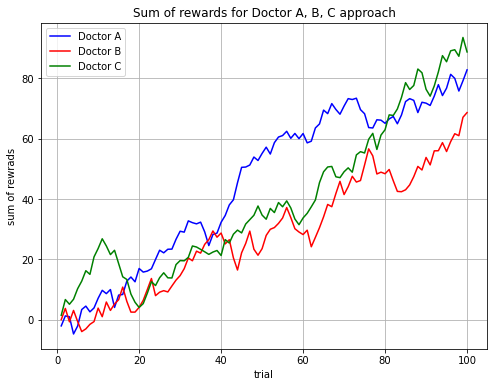

###################################### Run number 17 ###########################################


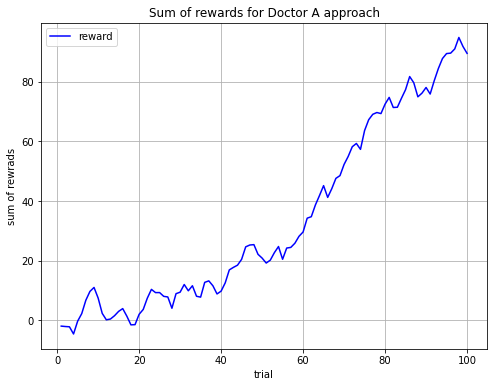

Lower bound: -2.0303768827820576
Upper bound:  90.3628809302818


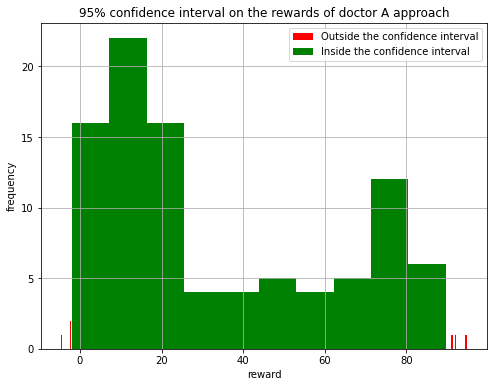

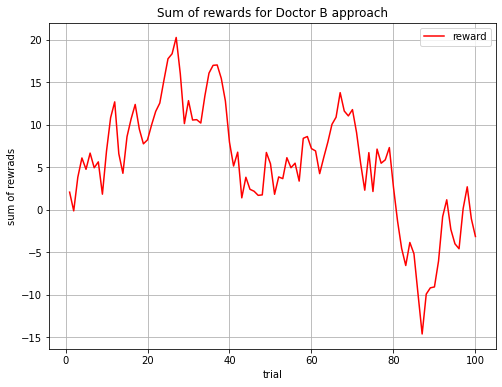

Lower bound: -9.572319008376438
Upper bound:  17.41662292131356


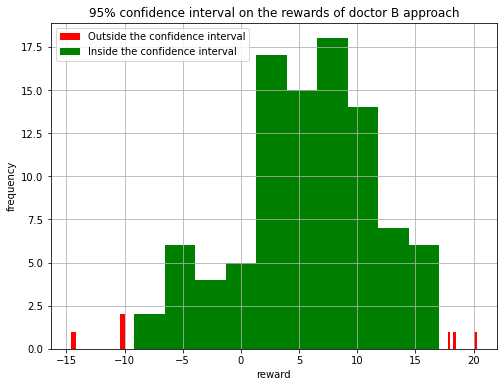

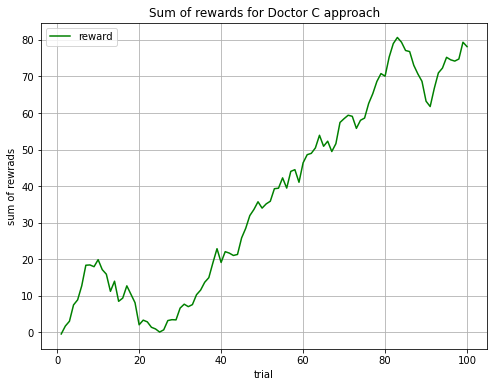

Lower bound: 0.7837305262211862
Upper bound:  79.17418907936131


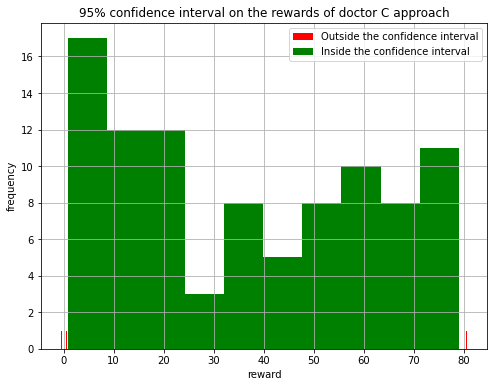

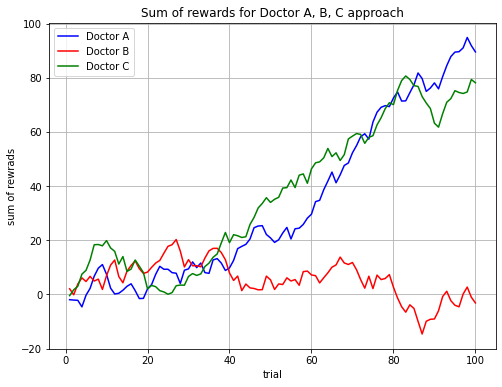

###################################### Run number 18 ###########################################


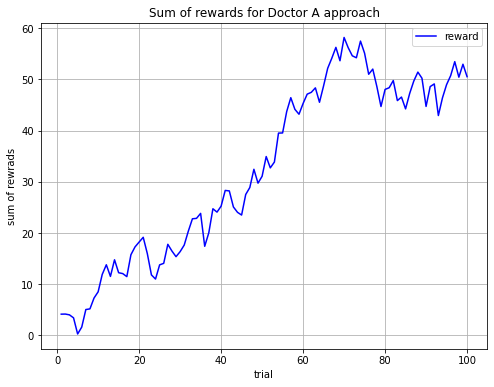

Lower bound: 3.721761219731181
Upper bound:  56.24238085309257


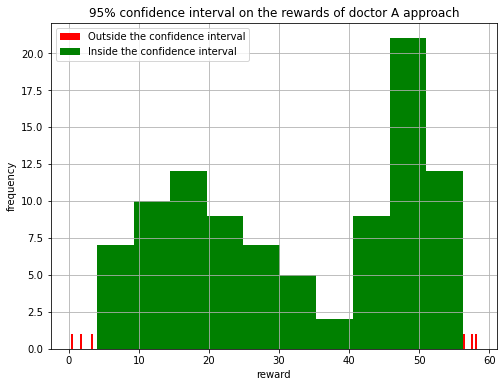

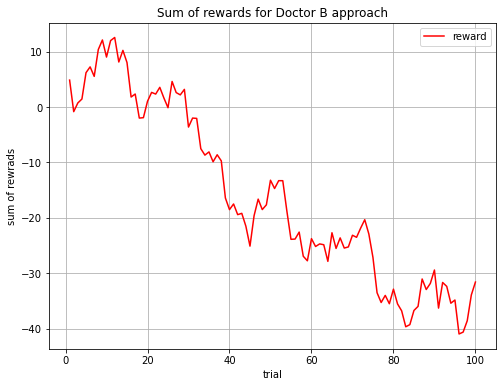

Lower bound: -39.49910466118689
Upper bound:  11.22226522613721


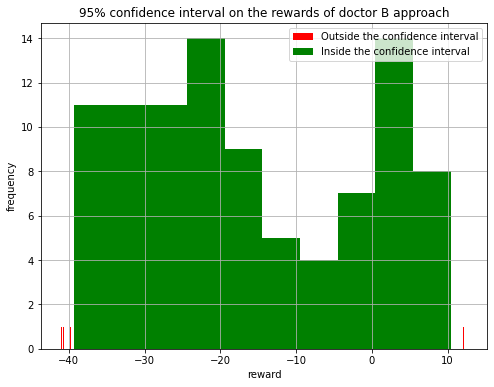

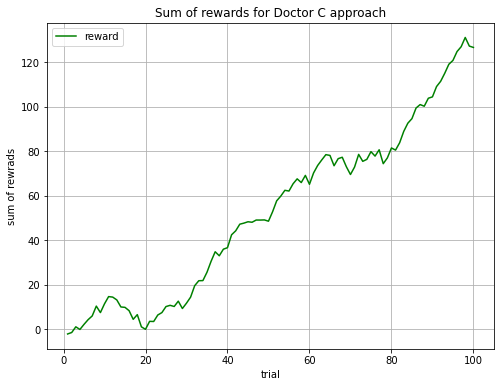

Lower bound: -0.18951493089512197
Upper bound:  126.7824777435519


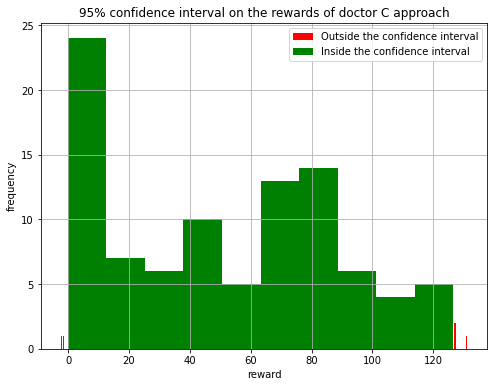

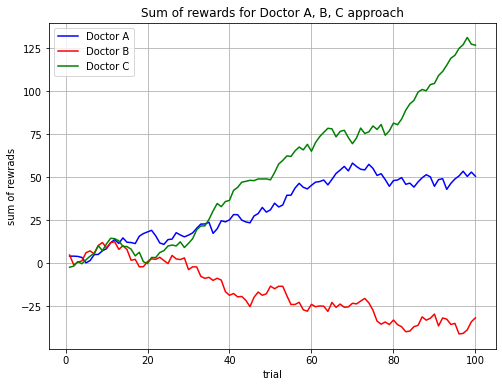

###################################### Run number 19 ###########################################


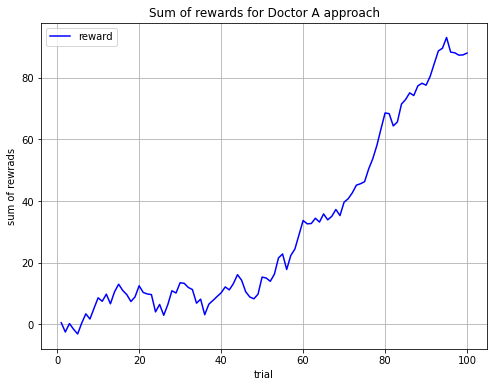

Lower bound: -0.7932948298790875
Upper bound:  88.5828778565606


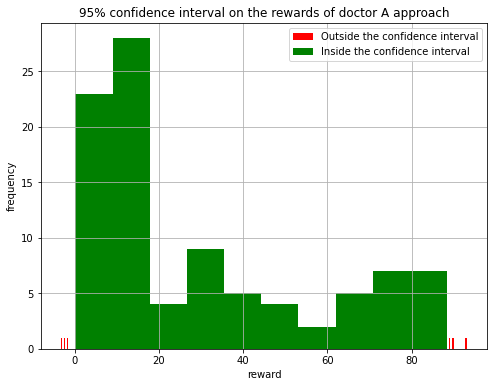

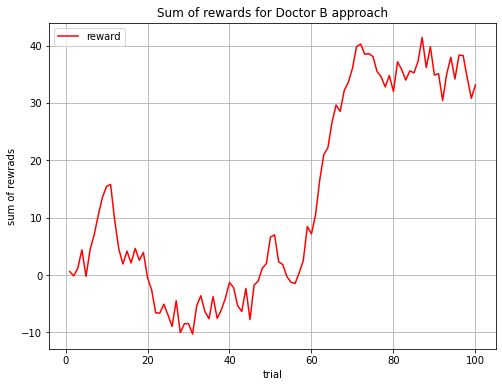

Lower bound: -8.753525384004162
Upper bound:  39.799014969394726


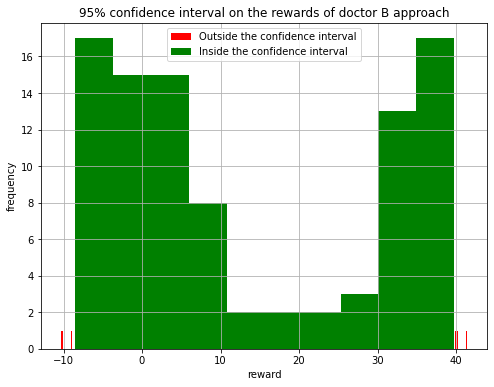

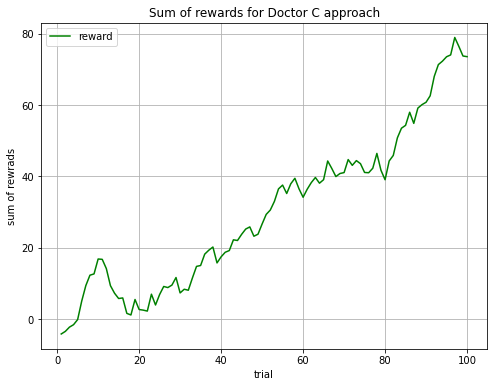

Lower bound: -1.9390801969083313
Upper bound:  73.87552926138686


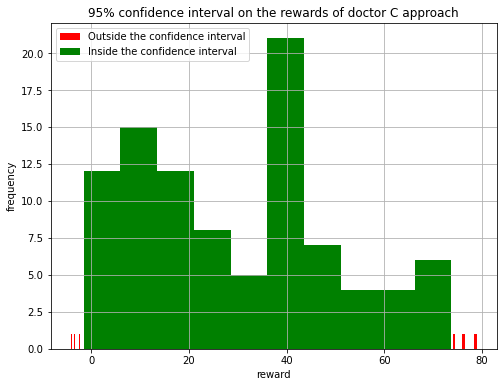

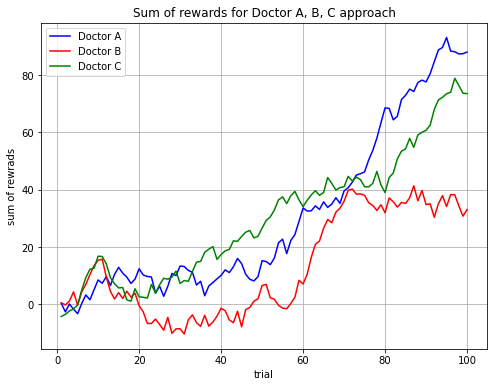

###################################### Run number 20 ###########################################


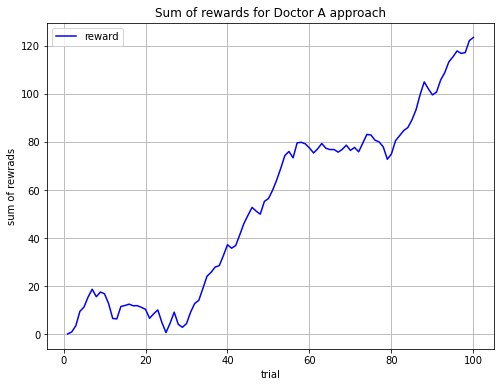

Lower bound: 1.9023909744429406
Upper bound:  117.4412849868358


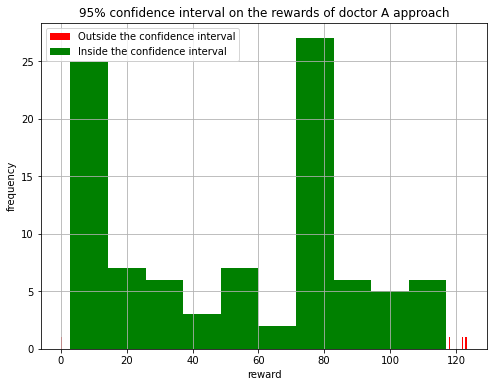

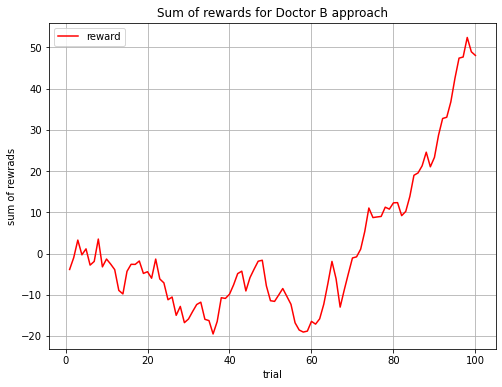

Lower bound: -18.70103484910268
Upper bound:  47.87170863383886


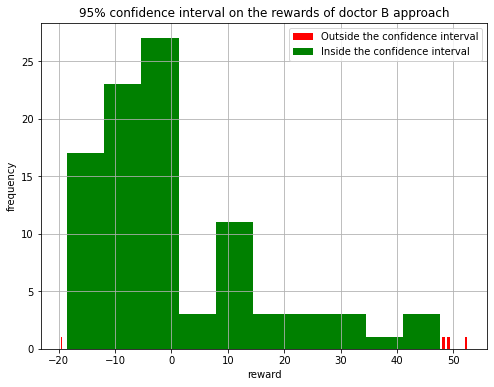

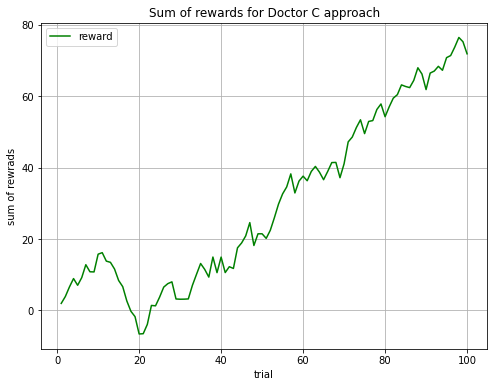

Lower bound: -2.8589267818989708
Upper bound:  72.80796448120093


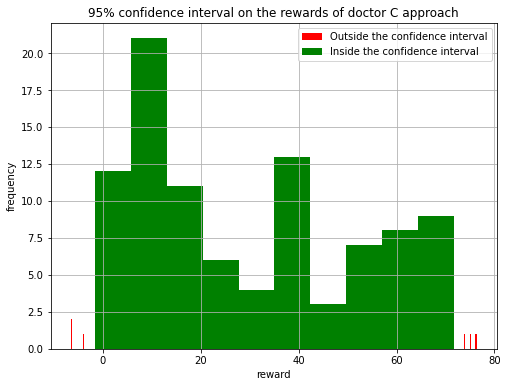

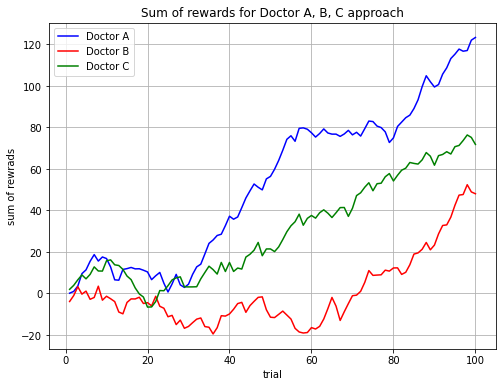

In [12]:
repeat_run_of_Q2(20)

# Question 4

In [7]:
def draw_box_plot(doctors_name, rewards):
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(rewards)
    plt.title("Box plot of doctors approach")
    plt.xlabel('doctors')
    plt.ylabel('reward')
    plt.xticks(range(1, len(doctors_name)+1), doctors_name)
    plt.grid()
    plt.show()

## Run 10 times

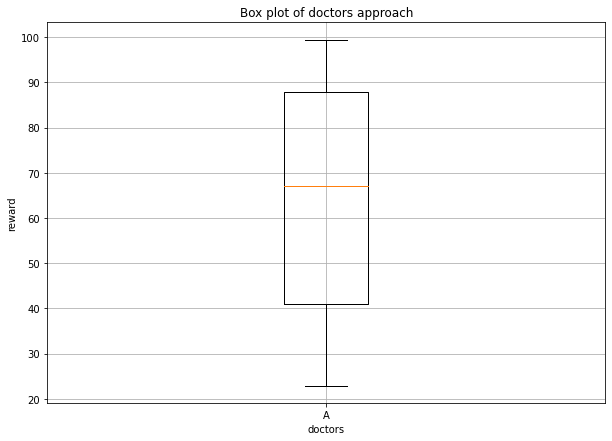

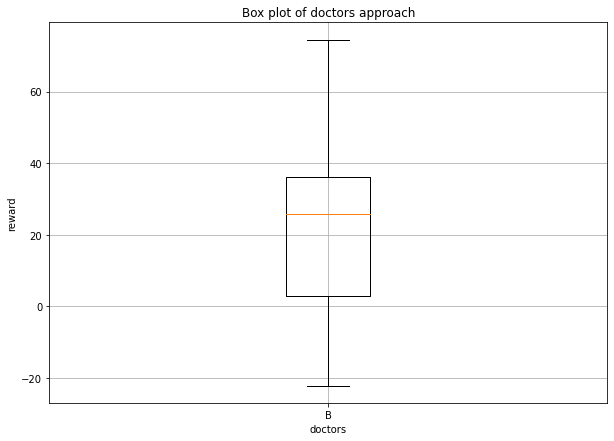

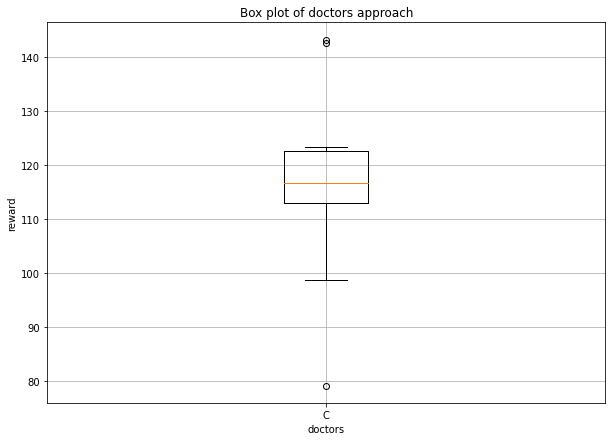

In [10]:
last_reward_a = []
for i in range(10):
    all_rewards = doctor_a_approach()
    last_reward_a.append(all_rewards[-1])
draw_box_plot(["A"], last_reward_a)
    
print("=================================================================================")
    
last_reward_b = []
for i in range(10):
    all_rewards = doctor_b_approach()
    last_reward_b.append(all_rewards[-1])
draw_box_plot(["B"], last_reward_b)
    
print("=================================================================================")
    
last_reward_c = []
for i in range(10):
    all_rewards = doctor_c_approach()
    last_reward_c.append(all_rewards[-1])
draw_box_plot(["C"], last_reward_c)

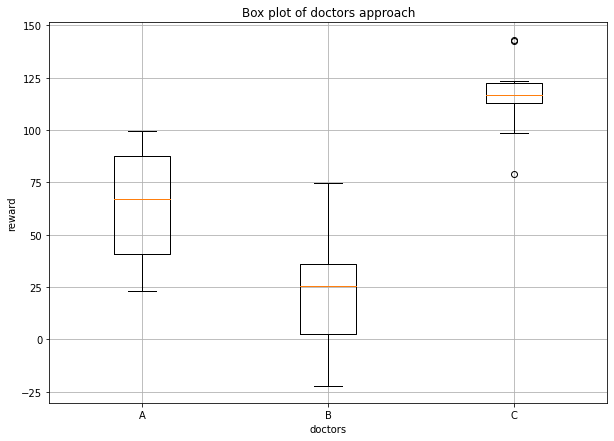

In [11]:
draw_box_plot(["A", "B", "C"], [last_reward_a, last_reward_b, last_reward_c])

# Question 5

In [66]:
reward_1 = 0
reward_2 = 0
r1_more_then_r2 = 0
number_of_runs = 1000000

for i in range(number_of_runs):
    reward_1 += get_reward(1, STUDENT_ID)
    reward_2 += get_reward(2, STUDENT_ID)
    if reward_1 > reward_2 : 
        r1_more_then_r2 += 1
    
print("Total rewards for {} times doing action #1 :".format(number_of_runs), reward_1)
print("Total rewards for {} times doing action #2 :".format(number_of_runs), reward_2)
print("The number of times that reward of action #1 is greater than reward of action #2 :", r1_more_then_r2)

Total rewards for 1000000 times doing action #1 : 1756594.4177150447
Total rewards for 1000000 times doing action #2 : -1403895.107887219
The number of times that reward of action #1 is greater than reward of action #2 : 999999
